# Importando bibliotecas

In [1]:
# Importação de bibliotecas necessárias para manipulação de dados, visualização, modelagem e avaliação de desempenho.

# Manipulação de dados
import pandas as pd  # Biblioteca para trabalhar com tabelas de dados estruturados (DataFrames)
import numpy as np  # Biblioteca para realizar operações matemáticas e lidar com arrays multidimensionais

# Visualização de dados
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos e visualizações básicas
import seaborn as sns  # Biblioteca para criar gráficos estatísticos mais elaborados e visualmente agradáveis

# Estatísticas
import scipy.stats as stats  # Biblioteca para realizar funções estatísticas e testes de hipóteses

# Utilitários do sistema
import os  # Biblioteca para operações relacionadas ao sistema operacional, como manipulação de diretórios e arquivos

# Modelos estatísticos
import statsmodels.api as sm  # Biblioteca para modelagem estatística avançada, incluindo regressão

# Estatísticas adicionais
from scipy.stats import skew  # Função para calcular a assimetria (skewness) de distribuições de dados

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler  # Ferramenta para normalizar dados antes da modelagem

# Análise de Componentes Principais (PCA)
from sklearn.decomposition import PCA  # Ferramenta para redução de dimensionalidade dos dados

# Conjuntos de dados de exemplo
from sklearn import datasets  # Conjuntos de dados embutidos no sklearn para testes e exemplos

# Regressão por Mínimos Quadrados Parciais
from sklearn.cross_decomposition import PLSRegression  # Ferramenta para criar modelos de regressão PLS

# Modelos de regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Ferramentas para criar diferentes modelos de regressão:
# LinearRegression: Regressão linear simples
# Ridge: Regressão linear com regularização L2
# Lasso: Regressão linear com regularização L1

# Divisão de dados em treino e teste
from sklearn.model_selection import train_test_split  # Divisão dos dados em conjuntos de treino e teste

# Métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error  # Métricas para avaliar a qualidade de modelos:
# mean_squared_error: Erro quadrático médio
# r2_score: Coeficiente de determinação (R²)
# root_mean_squared_error: Raiz quadrada do erro quadrático médio

# Criação de estimadores personalizados
from sklearn.base import BaseEstimator, RegressorMixin  # Classes base para criar estimadores personalizados

# Validação cruzada e estratégias de validação
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, cross_val_score  # Ferramentas para validação cruzada e avaliação de modelos:
# StratifiedKFold: Validação cruzada estratificada
# LeaveOneOut: Validação cruzada deixando uma amostra de fora por vez
# cross_val_score: Função para calcular scores de validação cruzada

from sklearn.model_selection import KFold  # Ferramenta para realizar validação cruzada com divisão simples (não estratificada)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2025-01-28 16:30:04.253704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738092604.832507    4285 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738092604.984856    4285 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 16:30:06.506715: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Carregando Dados

In [2]:
# Lendo os arquivos e salvando em variaveis
X = pd.read_csv('/home/guilherme/University/Inteligência Computacional Aplicada/2024.2/Homeworks/HW2/dataset/solubility/solTrainX.txt',sep='\t')
XT = pd.read_csv('/home/guilherme/University/Inteligência Computacional Aplicada/2024.2/Homeworks/HW2/dataset/solubility/solTrainXtrans.txt',sep='\t') 
Y = pd.read_csv('/home/guilherme/University/Inteligência Computacional Aplicada/2024.2/Homeworks/HW2/dataset/solubility/solTrainY.txt',sep='\t')
Xtest = pd.read_csv('/home/guilherme/University/Inteligência Computacional Aplicada/2024.2/Homeworks/HW2/dataset/solubility/solTestX.txt',sep='\t')
XTtest = pd.read_csv('/home/guilherme/University/Inteligência Computacional Aplicada/2024.2/Homeworks/HW2/dataset/solubility/solTestXtrans.txt',sep='\t')
Ytest = pd.read_csv('/home/guilherme/University/Inteligência Computacional Aplicada/2024.2/Homeworks/HW2/dataset/solubility/solTestY.txt',sep='\t')


# Renomear as coluna das Saídas
Y = Y.rename(columns={'x': 'Solubility'})
Ytest = Ytest.rename(columns={'x': 'Solubility'})

#Corrigindo os index
X = X.reset_index()
XT = XT.reset_index()
Y = Y.reset_index()
X = X.drop("index", axis='columns')
XT = XT.drop("index", axis='columns')
Y = Y.drop("index", axis='columns')

Xtest = Xtest.reset_index()
XTtest = XTtest.reset_index()
Ytest = Ytest.reset_index()
Xtest = Xtest.drop("index", axis='columns')
XTtest = XTtest.drop("index", axis='columns')
Ytest = Ytest.drop("index", axis='columns')

#Definindo as colunas que tem valores continuos
colunas_continuas = ['MolWeight', 'NumAtoms', 'NumNonHAtoms', 'NumBonds', 'NumNonHBonds',
                    'NumMultBonds', 'NumRotBonds', 'NumDblBonds', 'NumAromaticBonds',
                     'NumHydrogen', 'NumCarbon', 'NumNitrogen','NumOxygen', 'NumSulfer',
                    'NumChlorine', 'NumHalogen', 'NumRings', 'HydrophilicFactor',
                    'SurfaceArea1', 'SurfaceArea2']

# Pegando só as colunas continuas
Xcont = X[colunas_continuas]
XTcont = XT[colunas_continuas]
Xcontest = Xtest[colunas_continuas]
XTcontest = XTtest[colunas_continuas]

# 
cor_matrix = XT.corr()
cor_thresh = 0.8
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > cor_thresh)]
Xcor = XT.drop(columns=high_corr)
XcorTest = XTtest.drop(columns=high_corr)

list_x = [
    XT[['NumNonHAtoms']],  # DataFrame com uma coluna
    XT[['NumNonHBonds']],  # DataFrame com uma coluna
    XT[['MolWeight']],     # DataFrame com uma coluna
    XT[['NumNonHAtoms', 'NumNonHBonds']],  # Subconjunto com múltiplas colunas
    XT[['MolWeight', 'NumRings', 'NumCarbon', 'NumNonHBonds', 'SurfaceArea1']],  # Subconjunto com múltiplas colunas
    XTcont,    # DataFrame com as colunas contínuas
    Xcor,      # DataFrame com colunas filtradas
    XT         # Todas as colunas
]

list_xt = [
    XTtest[['NumNonHAtoms']],
    XTtest[['NumNonHBonds']],
    XTtest[['MolWeight']],
    XTtest[['NumNonHAtoms', 'NumNonHBonds']],
    XTtest[['MolWeight', 'NumRings', 'NumCarbon', 'NumNonHBonds', 'SurfaceArea1']],
    XTcontest,
    XcorTest,
    XTtest
]

# Lista de títulos
list_titulo = [
    'Utilizando só NumNonHAtoms',
    'Utilizando só NumNonHBonds',
    'Utilizando só MolWeight',
    'Utilizando NumNonHAtoms e NumNonHBonds',
    'MolWeight, NumRings, NumCarbon, NumNonHBonds, SurfaceArea1',
    'Utilizando as colunas contínuas',
    'Utilizando colunas filtradas por correlação',
    'Utilizando todas as colunas'
]

# Criar o dicionário de testes
testes = {
    'Descricao': list_titulo,
    'Treino': list_x,
    'Teste': list_xt
}
#
seed = 100

|Nome da Variavel|Descrição|
|----------------|---------|
|X|Variavel para os valores de entrada - treino|
|XT|Variavel para os valores de entrada transformados - treino|
|Xcont|Variavel para os valores de entrada continuos - treino|
|XTcont|Variavel para os valores de entrada continuos transformados - treino|
|Y|Variavel para os valores da saída - treino|
|Xtest|Variavel para os valores de entrada - teste|
|XTtest|Variavel para os valores de entrada transformados - teste|
|Xcontest|Variavel para os valores de entrada continuos - teste|
|XTcontest|Variavel para os valores de entrada continuos transformados - teste|
|Ytest|Variavel para os valores da saída - teste|
|colunas_continuas|Variavel com o nome das colunas continuas|
|Xcor|Variavel para os valores de entrada excluindo repetições de colunas com mais de 0.8 de correlação - treino|
|XcorTest|Variavel para os valores de entrada excluindo repetições de colunas com mais de 0.8 de correlação - teste|
|list_x|lista com todos diferentes versões do conjunto de entrada de treino|
|list_xt|lista com todos diferentes versões do conjunto de entrada de teste|
|list_titulo|Lista com o a descrição para as colunas de list_x e list_xt|
|testes|Dicinário com a junção de list_x,list_xt e list_titulos para realizar os teste|

# Funções Gerais

In [3]:
def calcular_rmse(y, y_pred):
    """
    Calcula o RMSE usando sklearn.metrics.
    Args:
        y: A saída esperada
        y_pred: A saída predita pelo modelo
    Returns:
        Retorna o RMSE entre os valores esperado e previsto
    """
    return root_mean_squared_error(y, y_pred)

def calcular_r2(y, y_pred):
    """
    Calcula o R² usando sklearn.metrics.
    Args:
        y: A saída esperada
        y_pred: A saída predita pelo modelo
    Returns:
        Retorna o R² entre os valores esperado e previsto
    """
    return r2_score(y, y_pred)

In [4]:
def cross_validation_scratch(modelo, x, y, k, pca = None, network = False):
    """
    Realiza o cross validation.
    Args:
        modelo: Modelo de inteligência computacional
        x: A entrada do modelo.
        y: A saída desejada.
        k: Número de folds no cross validation
        pca: Variavel usada para verificar se estamos fazendo uma PCAR (Regressão com PCA)
        network: Variavel usada para verificar se estamos fazendo o cross validation para uma rede neural
    Returns:
        Retorna o RMSE médio e R² médio do modelo.
    """
    rmse_list = []
    r2_list = []
    
    tamanho = len(x)
    passo = int(tamanho/k)
    inicio_k = 0
    fim_k = passo
    
    # Lógica do Cros-validation
    for i in range(k):
        if i == 0:
            x_val = x.iloc[inicio_k:fim_k,:]
            y_val = y.iloc[inicio_k:fim_k,:]
            x_train = x.iloc[fim_k:,:]
            y_train = y.iloc[fim_k:,:]
        
        elif i == (k-1):
            fim_k = tamanho
            x_val = x.iloc[inicio_k:fim_k,:]
            y_val = y.iloc[inicio_k:fim_k,:]
            x_train = x.iloc[0:inicio_k,:]
            y_train = y.iloc[0:inicio_k:,:]
        
        else:
            x_val = x.iloc[inicio_k:fim_k,:]
            y_val = y.iloc[inicio_k:fim_k,:]
            primeiro_intervalo = x.iloc[0:inicio_k,:]
            segundo_intervalo = x.iloc[fim_k:,:]
            x_train = pd.concat([primeiro_intervalo, segundo_intervalo], ignore_index=True)
            primeiro_intervalo = y.iloc[0:inicio_k,:]
            segundo_intervalo = y.iloc[fim_k:,:]
            y_train = pd.concat([primeiro_intervalo, segundo_intervalo], ignore_index=True)
            
        if pca is not None:
            pca.fit(x_train)
            x_train = pd.DataFrame(pca.transform(x_train))
            x_val = pd.DataFrame(pca.transform(x_val))

        if network is False:
            modelo.fit(x_train, y_train)
            y_pred = modelo.predict(x_val)
            
        if network is True:
            modelo.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
            y_pred = modelo.predict(x_val)
        
        rmse = calcular_rmse(y_val, y_pred)
        r2 = calcular_r2(y_val, y_pred)
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        inicio_k = fim_k
        fim_k = inicio_k + passo
        
        if fim_k > tamanho:
            fim_k = tamanho
    return np.mean(rmse_list), np.mean(r2_list)

In [5]:
# Sigmoid
def sigmoid(x):
    """Função Sigmoid"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivada da função Sigmoid"""
    s = sigmoid(x)
    return s * (1 - s)

# Tanh
def tanh(x):
    """Função Tanh"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivada da função Tanh"""
    return 1 - np.tanh(x) ** 2

# ReLU
def relu(x):
    """Função ReLU"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivada da função ReLU"""
    return np.where(x > 0, 1, 0)

# Leaky ReLU
def leaky_relu(x, alpha=0.01):
    """Função Leaky ReLU"""
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    """Derivada da função Leaky ReLU"""
    return np.where(x > 0, 1, alpha)

# Softmax
def softmax(x):
    """Função Softmax"""
    exp_x = np.exp(x - np.max(x))  # Subtração para estabilidade numérica
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def softmax_derivative(x):
    """Derivada da função Softmax"""
    s = softmax(x)
    return s * (1 - s)  # Apenas aplicável em problemas específicos (ex. saída binária)

# Linear
def linear(x):
    """Função Linear"""
    return x

def linear_derivative(x):
    """Derivada da função Linear"""
    return np.ones_like(x)

# Parte 0 - Analise Incodicional

## Funções Parte 0

In [6]:
def calcular_estatisticas(dados, coluna):
    """
    Realiza as estatisticas de um preditor do conjunto de dados

    Args:
        dados: DataFrame pandas contendo os dados.
        coluna: Preditor especifico que se deseja calcular a estatisticas

    Returns:
        Lista de dicionários com estatísticas calculadas.
    """
    vetor = np.array(dados[coluna])
    return {
        'coluna': coluna,
        'vetor': vetor,
        'media': np.mean(vetor),
        'desvio_padrao': np.std(vetor),
        'variancia': np.var(vetor),
        'assimetria': skew(vetor)
    }

In [7]:
def plots_estatisticas(estatisticas):
    """
    Plotar as métricas, histograma e boxplot dos preditores

    Args:
        estatisticas: Dicionário contendo os valores da função calcular_estatisticas
    """
    plt.figure(figsize=(8, 20))

    # Histograma Matplot
    plt.subplot(3, 1, 1)
    plt.hist(estatisticas['vetor'], color='blue')
    plt.xlabel(estatisticas['coluna'])
    plt.ylabel('Frequência')
    plt.title(f'Distribuição de {estatisticas["coluna"]}')
    plt.grid(False)

    # Histograma seaborn
    plt.subplot(3, 1, 2)
    sns.histplot(estatisticas['vetor'], kde=True, bins=30)
    plt.xlabel(estatisticas['coluna'])
    plt.ylabel('Frequência')
    plt.title(f'Distribuição de {estatisticas["coluna"]}')
    plt.grid(False)

    # Boxplot Matplot
    plt.subplot(3, 1, 3)
    plt.boxplot(estatisticas['vetor'])
    plt.ylabel('Valor')
    plt.title(f'Boxplot de {estatisticas["coluna"]}')
    plt.grid(False)


    plt.show()


In [8]:
def processar_dataset(dados, colunas_especificas=None):
    """
    Processa um DataFrame para calcular estatísticas e gerar gráficos.

    Args:
        dados: DataFrame pandas contendo os dados.
        colunas_especificas: Lista de colunas específicas para análise.
                             Se None, analisa todas as colunas numéricas.

    Returns:
        Lista de dicionários com estatísticas calculadas.
    """
    # Filtra as colunas específicas ou todas as numéricas se não especificado
    if colunas_especificas:
        colunas_numericas = [col for col in colunas_especificas if col in dados.columns]
    else:
        colunas_numericas = dados.select_dtypes(include=[np.number]).columns

    resultados = []

    for coluna in colunas_numericas:
        estatisticas = calcular_estatisticas(dados, coluna)
        print(f"\nEstatísticas da coluna {coluna}:")
        print(f"Média: {estatisticas['media']}")
        print(f"Desvio padrão: {estatisticas['desvio_padrao']}")
        print(f"Variância: {estatisticas['variancia']}")
        print(f"Assimetria: {estatisticas['assimetria']}")
        #plots_estatisticas(estatisticas)
        resultados.append(estatisticas)

    return resultados

In [9]:
def scatter_plots(dados, output):
    """
    Cria scatter plots entre todas as colunas do DataFrame e a coluna de saída (output).

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        output_column (str): Nome da coluna de saída para os plots.
    """
    # Verifica se o DataFrame contém a coluna de saída
    if output not in dados.columns:
        raise ValueError(f"A coluna '{output}' não existe no DataFrame.")

    # Itera sobre todas as colunas, exceto a de saída
    for coluna in dados.columns:
        if coluna == output:
            continue

        # Cria o scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(dados[coluna], dados[output], alpha=0.6)
        plt.title(f"{coluna} vs {output}")
        plt.xlabel(coluna)
        plt.ylabel(output)
        plt.show()

        plt.close()

## Comparação entre os dados normais e os dados transformados

In [10]:
coluna = [colunas_continuas[0]]
print('Sem pré processar')
resultados = processar_dataset(Xcont,coluna)
print('Com pré processamento')
resultados = processar_dataset(XTcont,coluna)

Sem pré processar

Estatísticas da coluna MolWeight:
Média: 201.6535751840168
Desvio padrão: 97.85648102338494
Variância: 9575.890878280097
Assimetria: 0.9883829857575356
Com pré processamento

Estatísticas da coluna MolWeight:
Média: 5.199017988984151
Desvio padrão: 0.4773069169293026
Variância: 0.2278218929485562
Assimetria: -0.0002165669622997232


In [11]:
changed_values = X.compare(XT)
print(changed_values)

    MolWeight           NumAtoms           NumNonHAtoms           NumBonds  \
         self     other     self     other         self     other     self   
0      208.28  5.343673       28  3.367296           16  2.833213       30   
1      365.54  5.904108       49  3.912023           26  3.295837       52   
2      206.31  5.334215       33  3.526361           15  2.772589       33   
3      136.26  4.921877       26  3.295837           10  2.397895       26   
4      229.75  5.441335       31  3.465736           15  2.772589       31   
..        ...       ...      ...       ...          ...       ...      ...   
946    126.13  4.845210       15  2.772589            9  2.302585       15   
947    107.17  4.683704       17  2.890372            8  2.197225       17   
948    114.21  4.746757       22  3.135494            8  2.197225       21   
949    185.84  5.230253        6  1.945910            4  1.609438        5   
950    102.20  4.636669       21  3.091042            7  2.07944

## Plots Estatiscas das colunas continuas

In [12]:
resultados = processar_dataset(XTcont)


Estatísticas da coluna MolWeight:
Média: 5.199017988984151
Desvio padrão: 0.4773069169293026
Variância: 0.2278218929485562
Assimetria: -0.0002165669622997232

Estatísticas da coluna NumAtoms:
Média: 3.1739182100657635
Desvio padrão: 0.4567779339272602
Variância: 0.20864608092285647
Assimetria: -0.07141820379832685

Estatísticas da coluna NumNonHAtoms:
Média: 2.548705740724295
Desvio padrão: 0.4549942567345487
Variância: 0.2070197736614244
Assimetria: -0.05568604668333019

Estatísticas da coluna NumBonds:
Média: 3.176240813120746
Desvio padrão: 0.48798268189350325
Variância: 0.23812709782797598
Assimetria: -0.18846077050393992

Estatísticas da coluna NumNonHBonds:
Média: 3.3622574622274
Desvio padrão: 0.8806085445030586
Variância: 0.7754714086517953
Assimetria: 0.04331207773743356

Estatísticas da coluna NumMultBonds:
Média: 2.5790574884057516
Desvio padrão: 1.7287984389815487
Variância: 2.9887440426250396
Assimetria: -0.09481503699467907

Estatísticas da coluna NumRotBonds:
Média: 0.9

## Mapa de Correlação

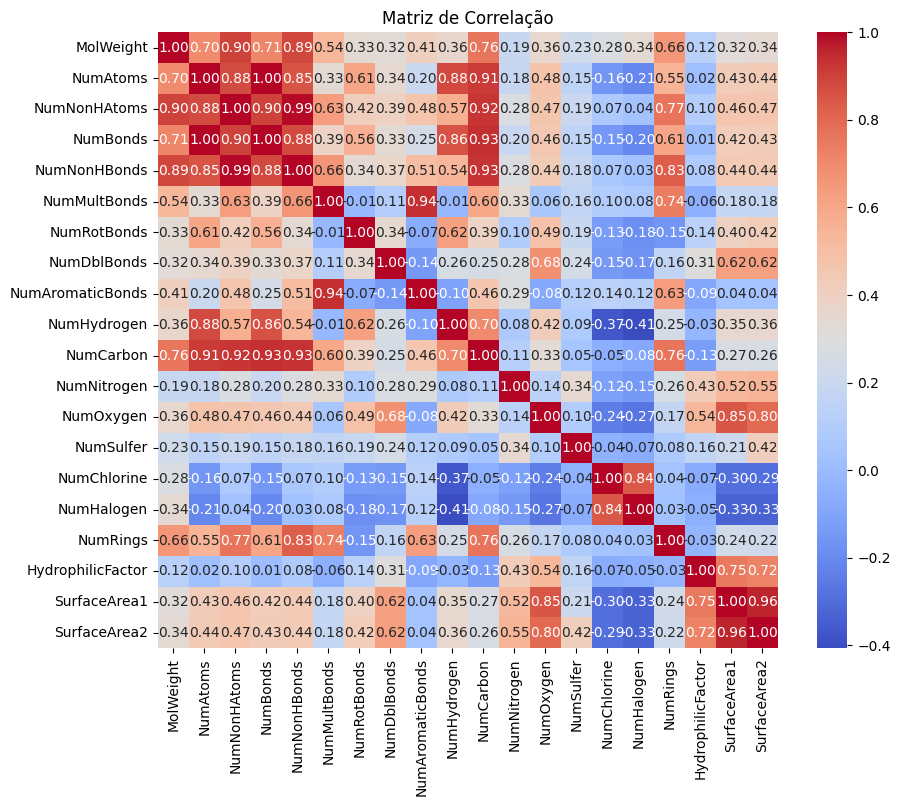

In [13]:
dados_uteis = XTcont
correlation_matrix = XTcont.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [14]:
#sns.pairplot(Xcont)
#plt.show

## Scatter Plots com a Saída

In [15]:
splots = pd.concat([XTcont.reset_index(drop=True), Y.reset_index(drop=True)], axis=1)
splots

MolWeight  NumAtoms  NumNonHAtoms  NumBonds  NumNonHBonds  NumMultBonds  \
0     5.343673  3.367296      2.833213  3.433987      4.009916      5.264609   
1     5.904108  3.912023      3.295837  3.970292      4.871752      4.684412   
2     5.334215  3.526361      2.772589  3.526361      3.705506      3.243492   
3     4.921877  3.295837      2.397895  3.295837      3.076971      1.379614   
4     5.441335  3.465736      2.772589  3.465736      3.705506      2.944766   
..         ...       ...           ...       ...           ...           ...   
946   4.845210  2.772589      2.302585  2.772589      2.924466      1.852753   
947   4.683704  2.890372      2.197225  2.890372      2.759228      2.944766   
948   4.746757  3.135494      2.197225  3.091042      2.578583      0.798770   
949   5.230253  1.945910      1.609438  1.791759      1.597540      0.798770   
950   4.636669  3.091042      2.079442  3.044522      2.378866      0.000000   

     NumRotBonds  NumDblBonds  NumAromaticBonds  NumHydrogen  ...  \
0       0.000000     0.000000          2.833213     3.862179  ...   
1       1.609438     0.000000          2.564949     5.315193  ...   
2       1.609438     0.567077          1.945910     4.729818  ...   
3       0.693147     0.804530          0.000000     4.465209  ...   
4       1.791759     0.000000          1.945910     4.465209  ...   
..           ...          ...               ...          ...  ...   
946     0.000000     0.941208          0.000000     2.642633  ...   
947     0.693147     0.000000          1.945910     3.317541  ...   
948     1.609438     0.567077          0.000000     4.177811  ...   
949     0.000000     0.567077          0.000000     1.301297  ...   
950     1.386294     0.000000          0.000000     4.177811  ...   

     NumNitrogen  NumOxygen  NumSulfer  NumChlorine  NumHalogen  NumRings  \
0       0.584815   0.000000      0.000        0.000    0.000000  1.386294   
1       0.642355   0.693147      0.375        0.000    0.000000  1.609438   
2       0.000000   1.098612      0.000        0.000    0.000000  0.693147   
3       0.000000   0.000000      0.000        0.000    0.000000  0.693147   
4       0.694335   0.000000      0.000        0.375    0.375000  0.693147   
..           ...        ...        ...          ...         ...       ...   
946     0.584815   1.098612      0.000        0.000    0.000000  0.693147   
947     0.456826   0.000000      0.000        0.000    0.000000  0.693147   
948     0.000000   0.693147      0.000        0.000    0.000000  0.000000   
949     0.000000   0.000000      0.000        0.000    0.444444  0.000000   
950     0.000000   0.693147      0.000        0.000    0.000000  0.000000   

     HydrophilicFactor  SurfaceArea1  SurfaceArea2  Solubility  
0            -1.606542      6.812456      6.812456       -3.97  
1            -0.441330      9.753834     12.029604       -3.98  
2            -0.384859      8.245324      8.245324       -3.99  
3            -2.373472      0.000000      0.000000       -4.00  
4            -0.070987      9.913535      9.913535       -4.06  
..                 ...           ...           ...         ...  
946           0.713897     10.916599     10.916599       -1.26  
947          -0.169051      4.481002      4.481002       -1.28  
948          -1.483783      5.456522      5.456522       -1.30  
949          -0.533242      0.000000      0.000000       -1.32  
950          -1.383379      3.837096      3.837096       -1.34  

[951 rows x 21 columns]

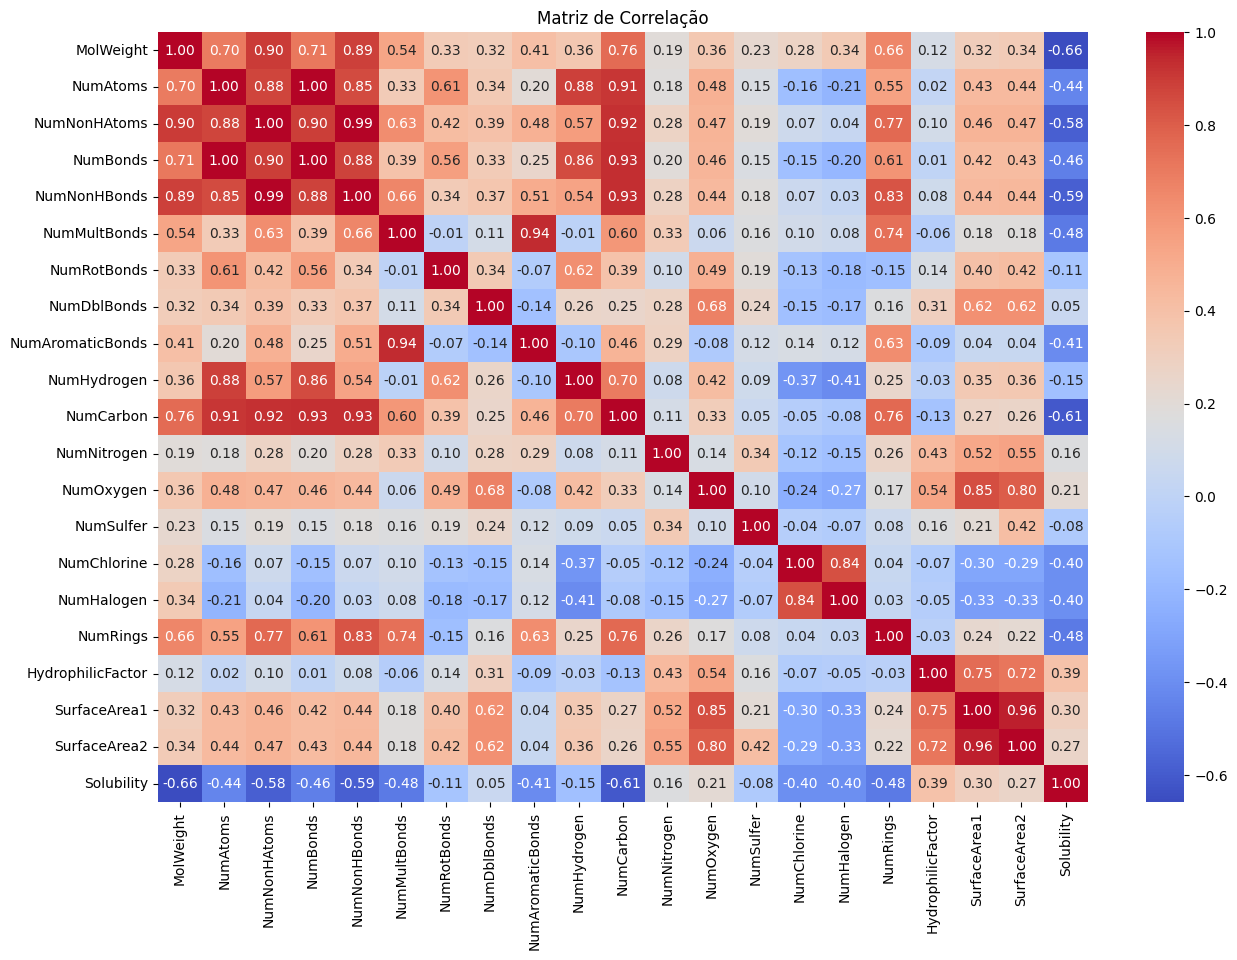

In [16]:
correlation_matrix = splots.corr()
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(15, 10))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

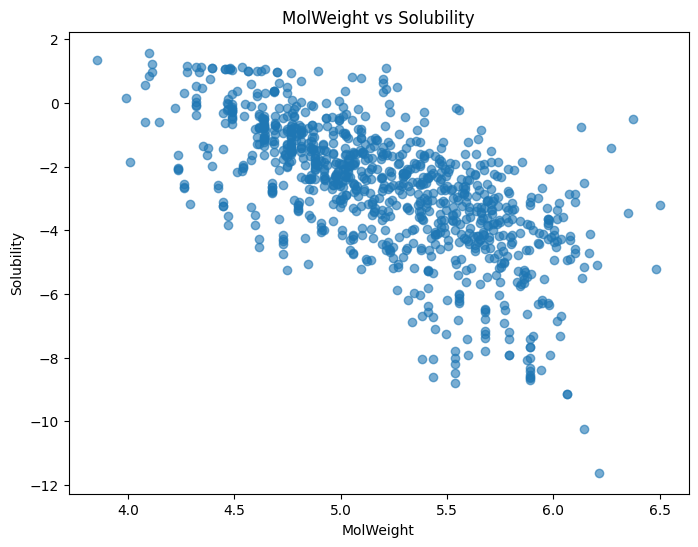

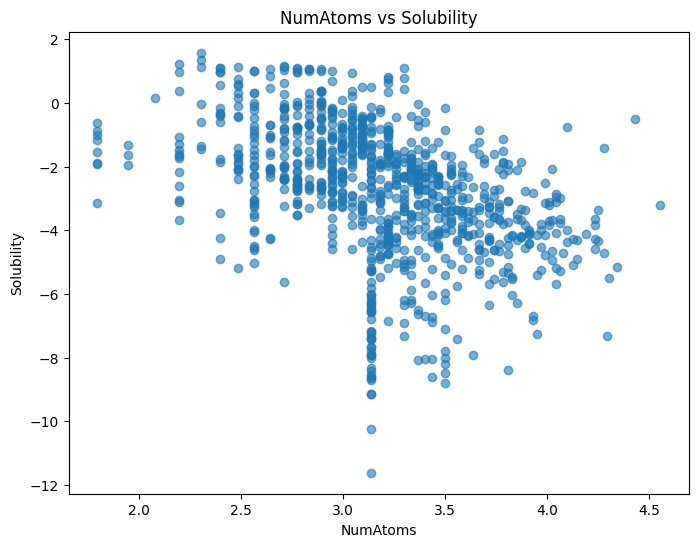

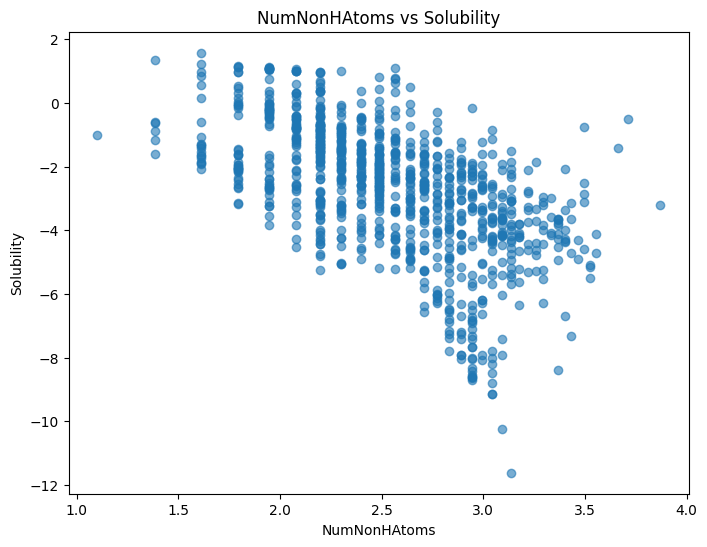

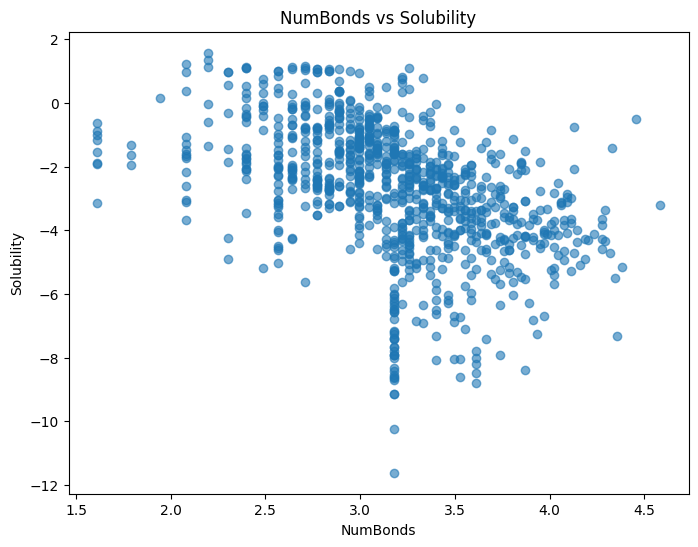

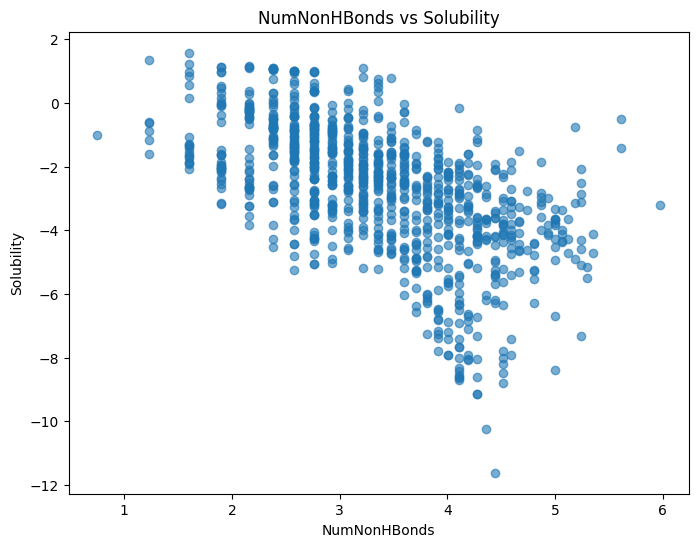

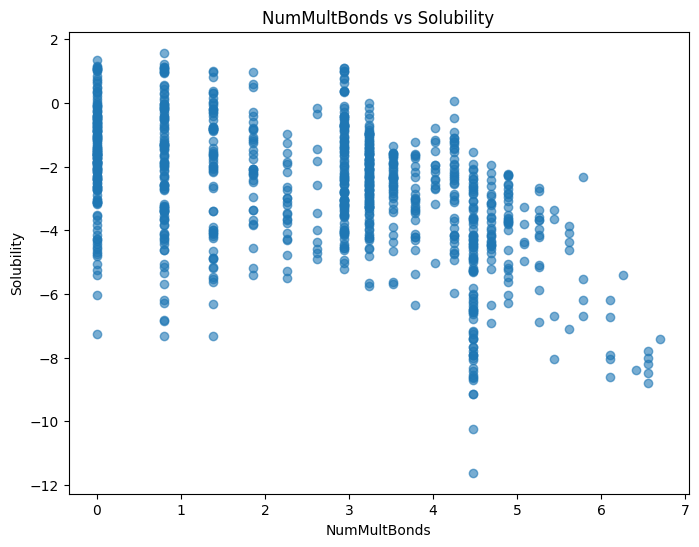

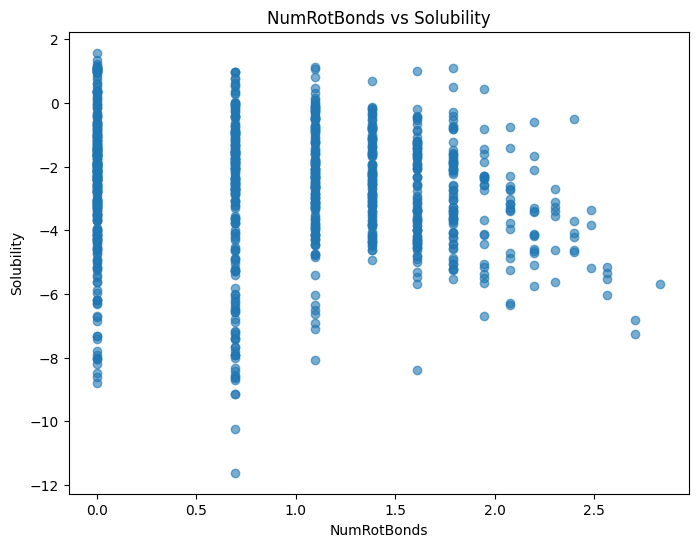

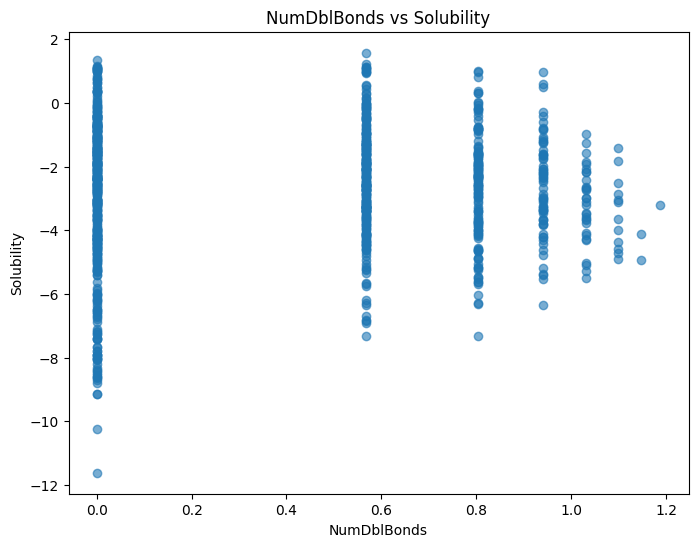

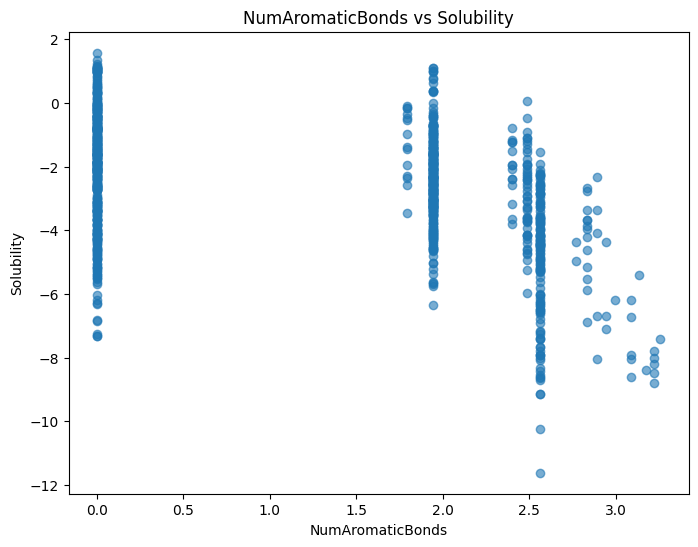

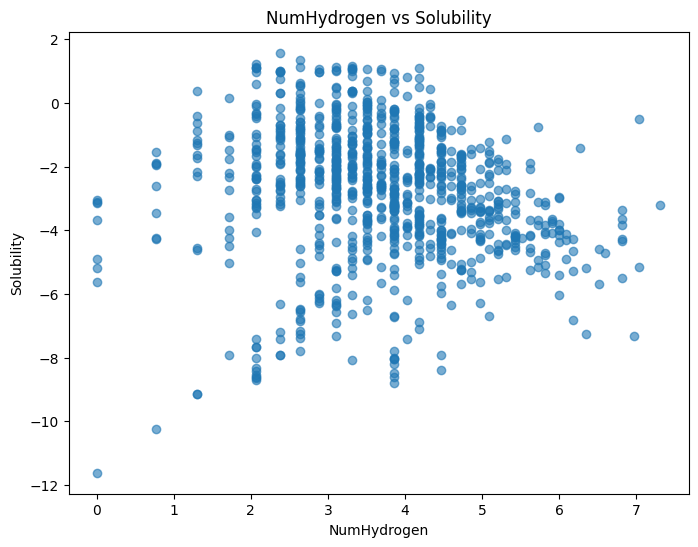

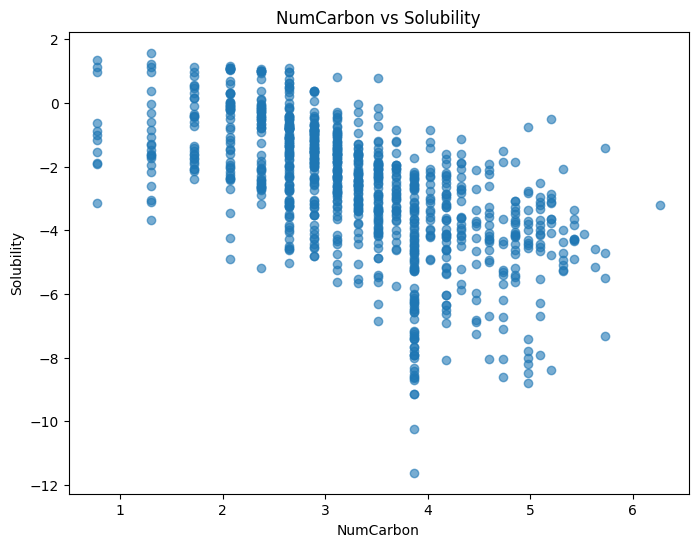

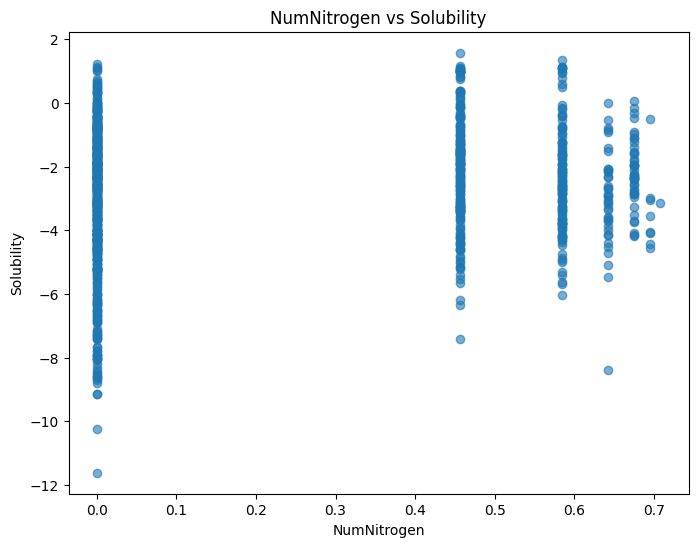

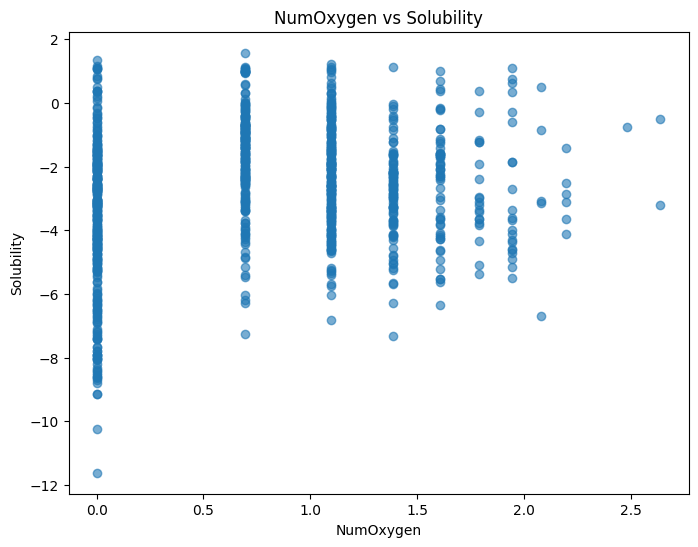

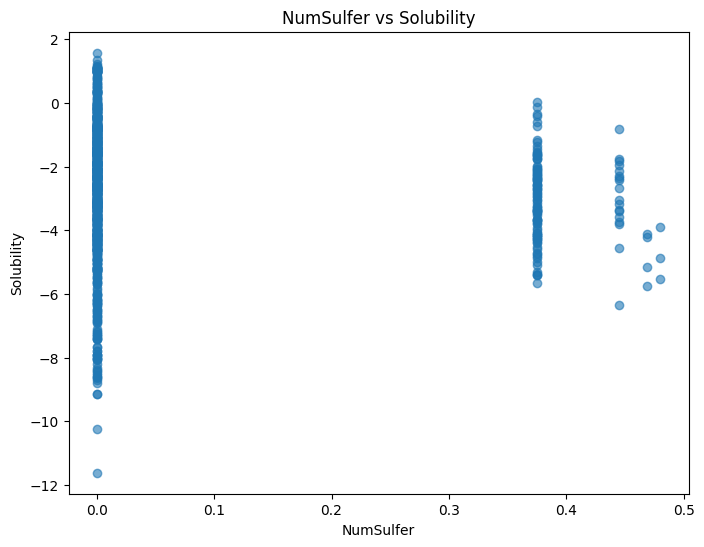

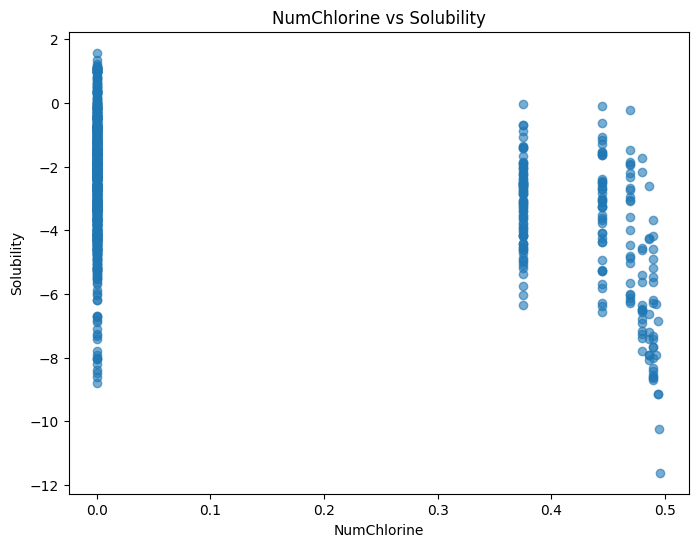

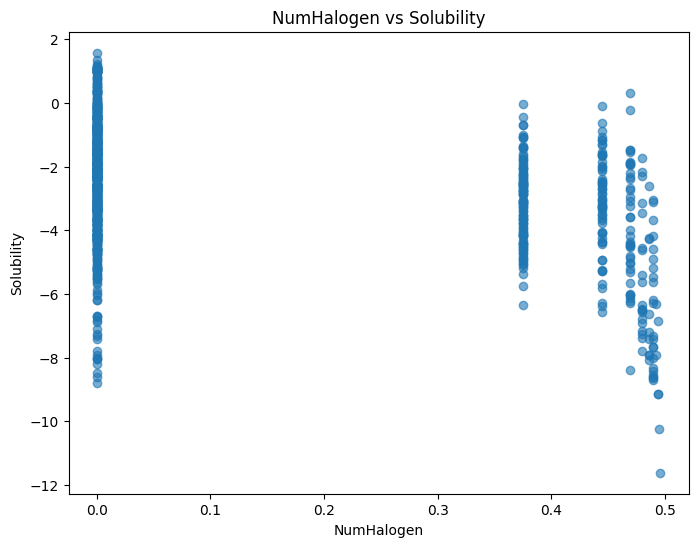

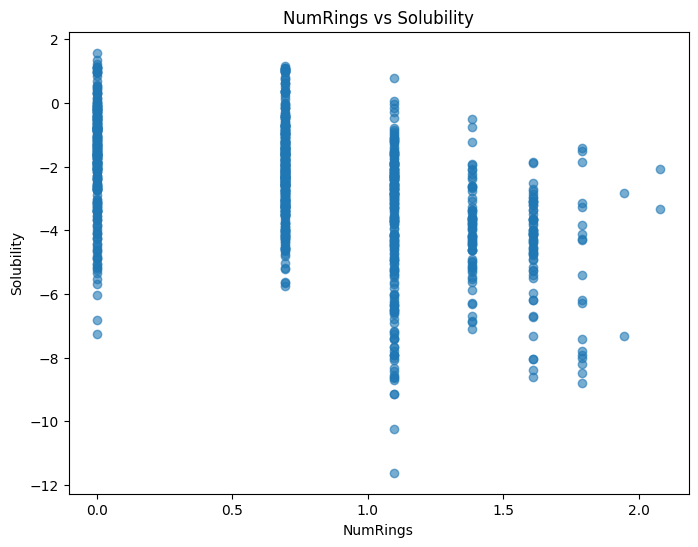

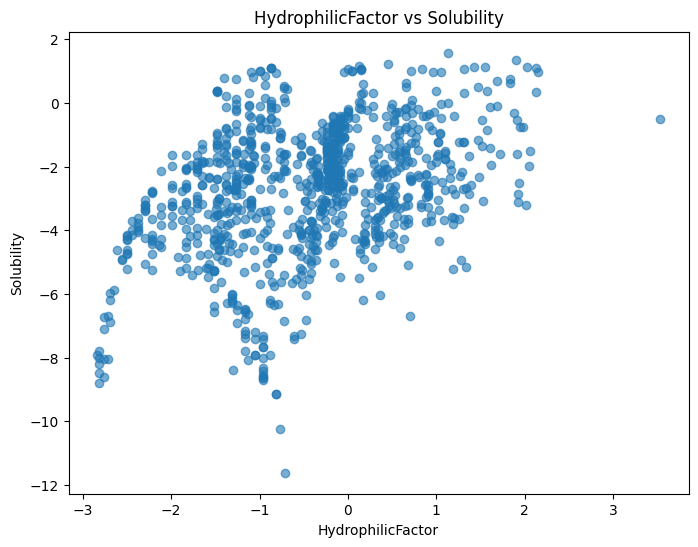

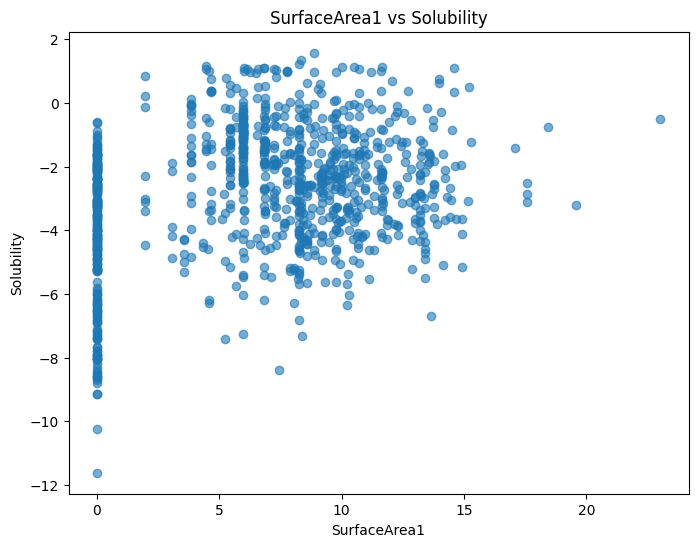

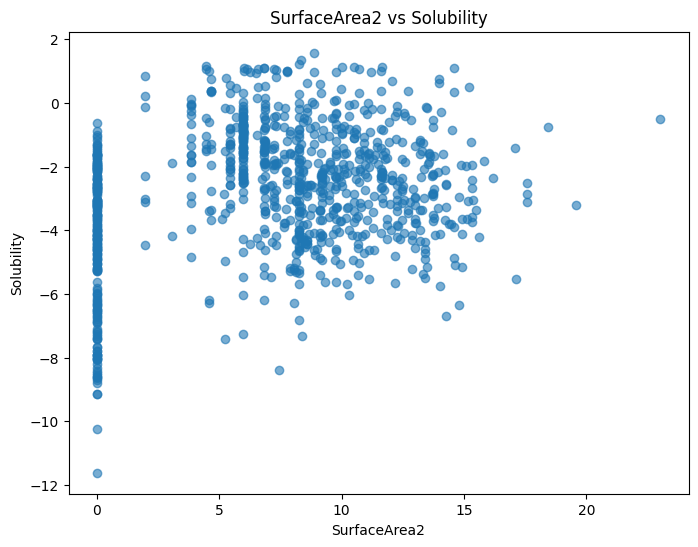

In [17]:
scatter_plots(splots, 'Solubility')

# Parte 1 - OLS

In [18]:
class MyOLS(BaseEstimator, RegressorMixin):
    """
    Classe criada para realizar o a Regressão Linear Ordinária. 
    Essa classe segue o mesmo padrão da OLS da biblioteca do sklearn 
    """
    # Inicialização da classe
    def __init__(self):
        self.coef = None
        self.descricao = None
        pass

    # Treinar o modelo com os dados de treino.
    def fit(self, entrada, saida):
        """
        Ajusta o modelo OLS com os dados de entrada (x) e saída (y).

        Args:
            Entrada: Os dados de Entrada para treinar o modelo e achar os parametros.
            Saída: Os dados de saída do dataset para treinar o modelo e achar os parametros.

        Return:
            Retorna o modelo
        """
        x = entrada.copy()
        x.insert(0, 'Intercepto', 1)  # Adiciona uma coluna de bias (intercepto)
        colunas_total =  x.columns.tolist()
        x = np.array(x)
        y = np.array(saida)
        self.coef = (np.linalg.inv(x.T @ x) @ x.T)@ y  # Coeficientes do modelo

        # Tabela dos coeficientes
        coef = {colunas_total[i]: self.coef[i] for i in range(len(self.coef))}
        self.descricao = pd.DataFrame(list(coef.items()), columns=['Variáveis', 'Coeficientes'])
        self.descricao['Coeficientes'] = self.descricao['Coeficientes'].apply(lambda x: round(x[0], 6))
        return self

    # Realizar a previsão dos dados.
    def predict(self, entrada):
        """
        Faz previsões usando os coeficientes do modelo ajustado.

        Args:
            Entrada: Os dados de Entrada para realizar a previsão.

        Return:
            Retorna a previsão para os dados de entrada.
        """
        x = entrada.copy()
        x.insert(0, 'Intercepto', 1)
        x = np.array(x)
        return x @ self.coef

    # Get da tabela da colunuas e seus coeficientes
    def get_descricao(self):
        """
        Retorna a tabela de descrições dos coeficientes.
        """
        return self.descricao

    # Get dos parametros da Regressão Linear
    def get_coef(self):
        """
        Retorna os coeficientes da OLS.
        """
        return self.coef

In [19]:
def procedimentos_parte_1(x,y,xt,yt,k):
    """
    Realiza as previsões e fazem os plots dos resultados para os diferentes modelos
    
    Args:
        x: Dados de Entrada para treino
        y: Dados de Saída para treino
        xt: Dados de Entrada para teste
        yt: Dados de Saída para teste
        k: Divisão para cross-validation
    
    """
    # Folds para divisão da cross-validation
    
    # Meu Modelo
    print('----------------------------------------------')
    print('Regressão Linear Ordinária feita por nós')
    
    # Fit e Predict
    #######################################################
    modelo = MyOLS()
    modelo.fit(x,y)
    y_pred = modelo.predict(xt)
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    
    # Plot da predição
    descricao = modelo.get_descricao()
    print('\n',descricao,'\n')
    print('Valor da aplicação no conjunto de teste')
    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    #######################################################
    for i in k:
        # Cross-validation scratch
        ########################################################
        rmse_cv, r2_cv = cross_validation_scratch(modelo, x, y, i)
        print(f"Média do cross-Validation feito criado por nós para {i} divisões")
        print(f"RMSE: {rmse_cv:.4f}, R²: {r2_cv:.4f}")
        ########################################################
        
        # Cross-validation pre-build
        ########################################################
        r2_build = cross_val_score(modelo, x, y, cv=i, scoring='r2').mean()
        rmse_build = np.sqrt(-cross_val_score(modelo, x, y, cv=i, scoring='neg_mean_squared_error').mean())
        print(f"Média do cross-Validation função pré pronta para {i} divisões")
        print(f"RMSE: {rmse_build:.4f}, R²: {r2_build:.4f}")
        ########################################################

    predito = y_pred
    observado = yt
    residual = observado - predito

    #---------------------------------------------------------------------------------------------------------------#
    
    #sklearn
    print('----------------------------------------------')
    print('Regressão Linear Ordinária do  sklearn')
    
    # Fit e Predict
    #######################################################
    modelo = LinearRegression()
    modelo.fit(x, y)
    y_pred = modelo.predict(xt)
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    
    # Pegando os coeficientes e fazendo uma relação com os respectivos preditores
    coef = {'Variável': x.columns, 'Coeficiente': modelo.coef_.flatten()}
    coef = pd.DataFrame(coef)
    intercepto = {'Variável': 'Intercepto', 'Coeficiente': np.array(modelo.intercept_).item()}
    descricao = pd.concat([pd.DataFrame([intercepto]), coef], ignore_index=True)
    
    # Plot da predição
    print('\n',descricao,'\n')
    print('Valor da aplicação no conjunto de teste')
    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    #######################################################

    for i in k:
        # Cross-validation scratch
        ########################################################
        rmse_cv, r2_cv = cross_validation_scratch(modelo, x, y, i)
        print(f"Média do cross-Validation feito criado por nós para {i} divisões")
        print(f"RMSE: {rmse_cv:.4f}, R²: {r2_cv:.4f}")
        ########################################################
        
        # Cross-validation pre-build
        ########################################################
        r2_build = cross_val_score(modelo, x, y, cv=i, scoring='r2').mean()
        rmse_build = np.sqrt(-cross_val_score(modelo, x, y, cv=i, scoring='neg_mean_squared_error').mean())
        print(f"Média do cross-Validation função pré pronta para {i} divisões")
        print(f"RMSE: {rmse_build:.4f}, R²: {r2_build:.4f}")
        ########################################################

    # Plot gráficos do erro
    plt.figure(figsize=(20, 10))

    # Gráfico 1: Observado vs. Predito
    plt.subplot(1, 2, 1)
    plt.scatter(predito, observado, alpha=0.7, color='black')
    plt.plot([predito.min(), predito.max()], [observado.min(), observado.max()], color='red', linestyle='--')
    plt.title("Observed vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Observed")
    plt.grid(True)
    
    # Gráfico 2: Resíduos vs. Predito
    plt.subplot(1, 2, 2)
    plt.scatter(predito, residual, alpha=0.7, color='black')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title("Residuals vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.grid(True)
    
    # Mostrar os gráficos
    plt.tight_layout()
    plt.show()
    

In [20]:
def scores_modelo(x,y,xt,yt,modelo,k):
    # Fit e Predict
    #######################################################
    modelo.fit(x,y)
    y_pred = modelo.predict(xt)
    
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    #######################################################
    
    # Cross-validation scratch
    ########################################################
    rmse_cv, r2_cv = cross_validation_scratch(modelo, x, y, k)
    #######################################################
    
    # Cross-validation pre-build
    ########################################################
    r2_build = cross_val_score(modelo, x, y, cv=k, scoring='r2').mean()
    rmse_build = np.sqrt(-cross_val_score(modelo, x, y, cv=k, scoring='neg_mean_squared_error').mean())
    #######################################################


###########################
Utilizando só NumNonHAtoms
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

       Variáveis  Coeficientes
0    Intercepto      3.968871
1  NumNonHAtoms     -2.623857 

Valor da aplicação no conjunto de teste
RMSE: 1.6596, R²: 0.3604
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.8477, R²: -2.9314
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 1.9106, R²: -2.9223
Média do cross-Validation feito criado por nós para 10 divisões
RMSE: 1.6967, R²: -12.4050
Média do cross-Validation função pré pronta para 10 divisões
RMSE: 1.7969, R²: -14.3059
----------------------------------------------
Regressão Linear Ordinária do  sklearn

        Variável  Coeficiente
0    Intercepto     3.968871
1  NumNonHAtoms    -2.623857 

Valor da aplicação no conjunto de teste
RMSE: 1.6596, R²: 0.3604
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.8

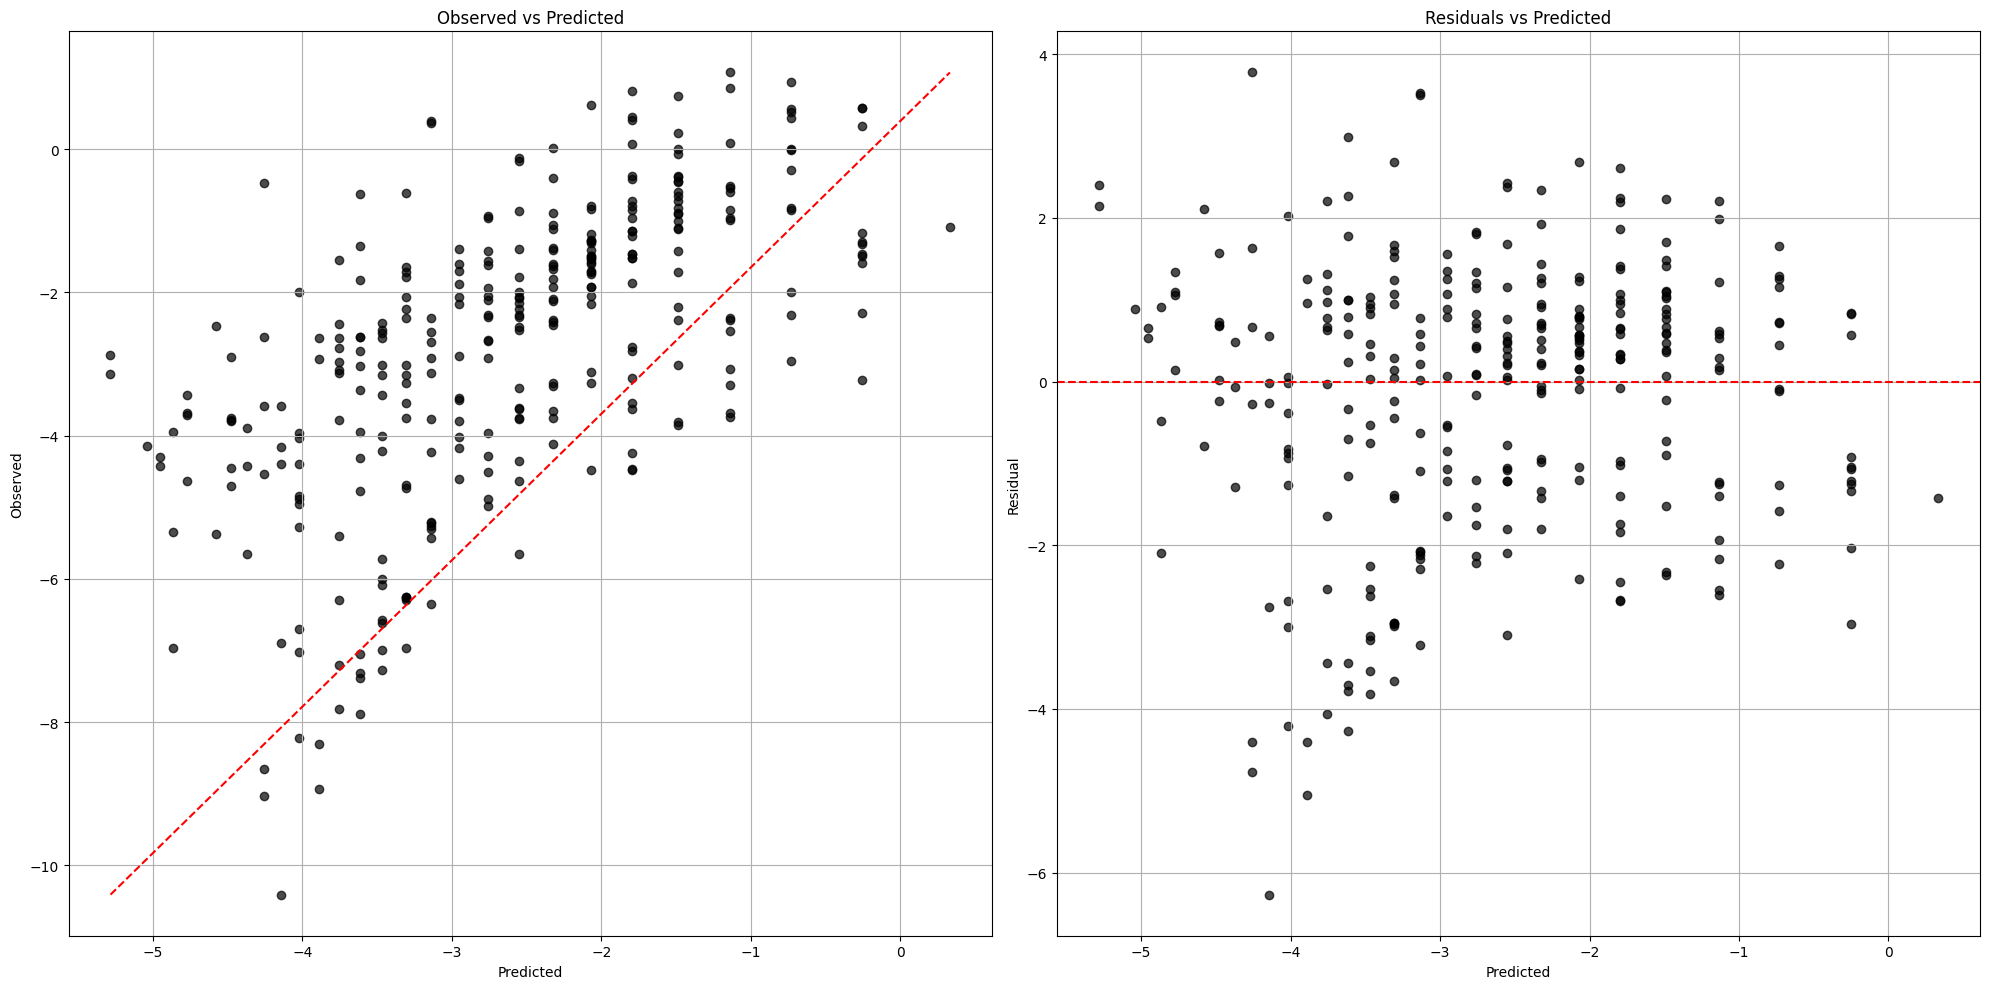


###########################
Utilizando só NumNonHBonds
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

       Variáveis  Coeficientes
0    Intercepto      1.851925
1  NumNonHBonds     -1.359353 

Valor da aplicação no conjunto de teste
RMSE: 1.6494, R²: 0.3683
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.8466, R²: -2.9059
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 1.9077, R²: -2.8974
Média do cross-Validation feito criado por nós para 10 divisões
RMSE: 1.6965, R²: -12.3653
Média do cross-Validation função pré pronta para 10 divisões
RMSE: 1.7942, R²: -14.2318
----------------------------------------------
Regressão Linear Ordinária do  sklearn

        Variável  Coeficiente
0    Intercepto     1.851925
1  NumNonHBonds    -1.359353 

Valor da aplicação no conjunto de teste
RMSE: 1.6494, R²: 0.3683
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.8

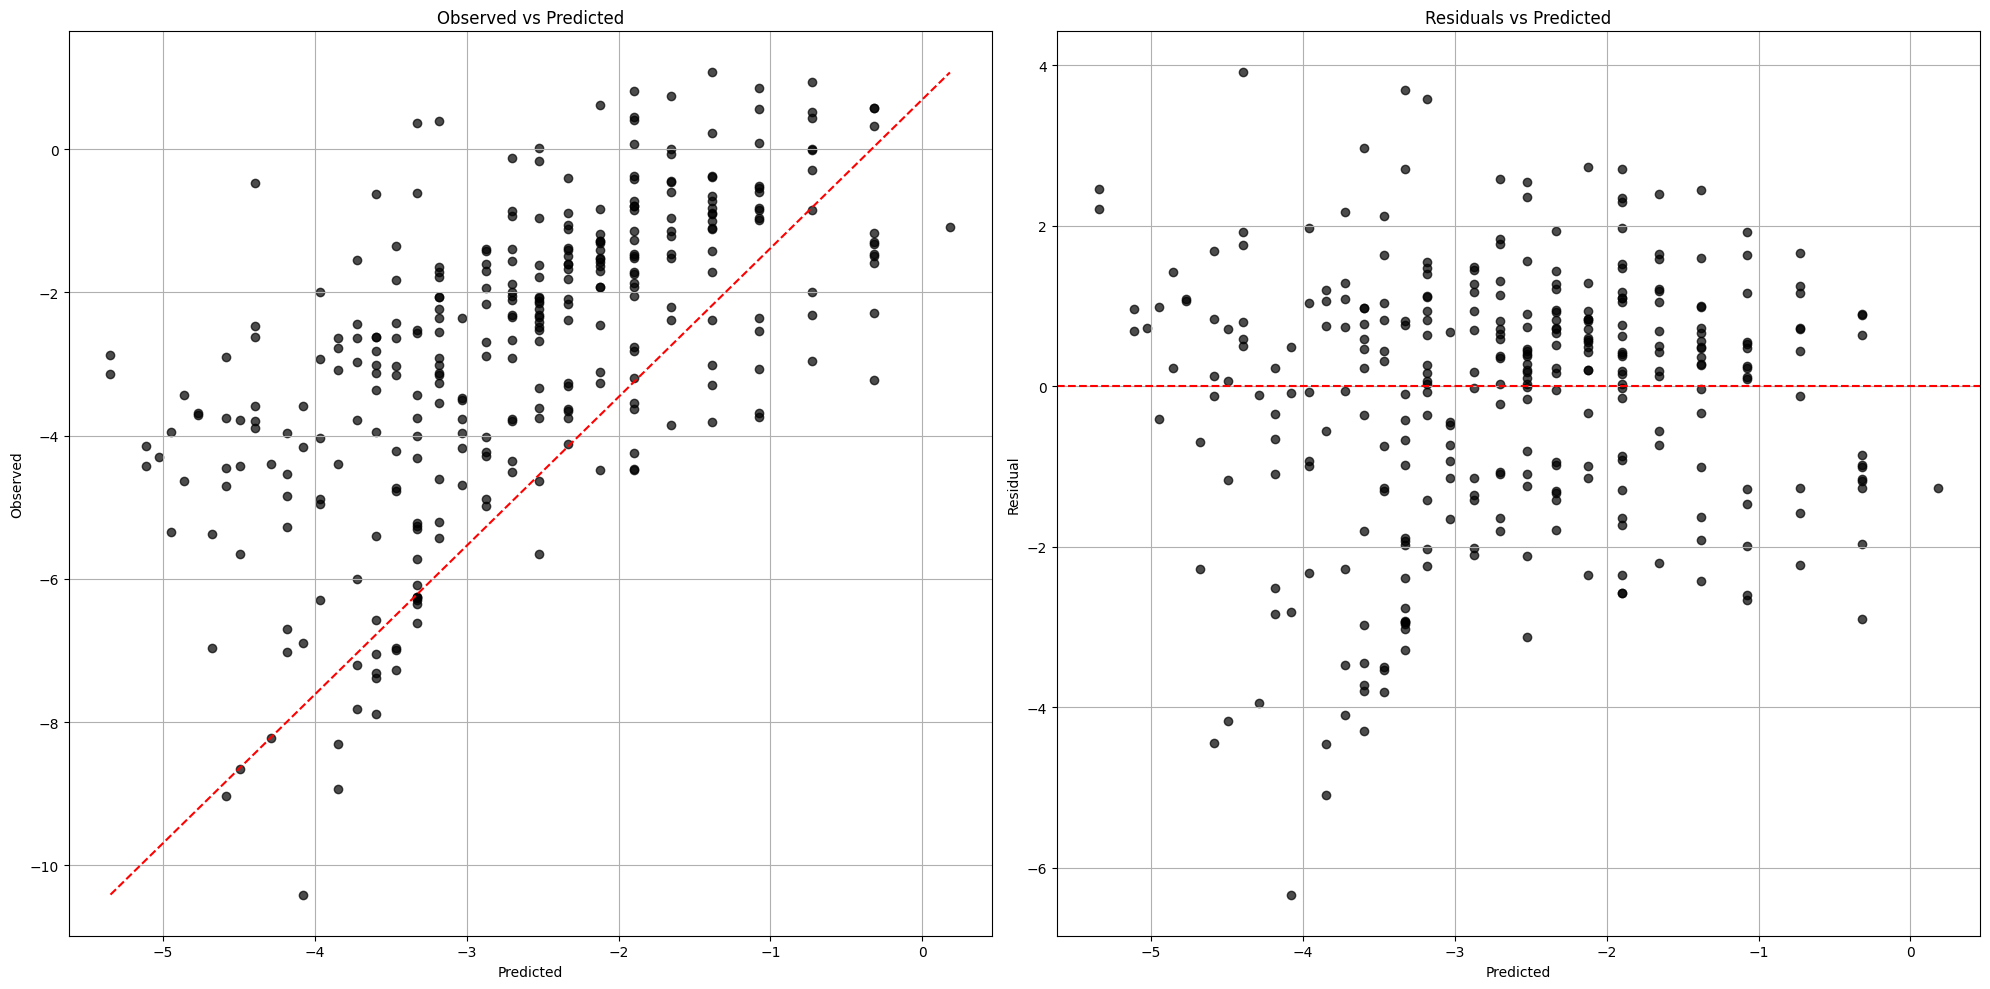


###########################
Utilizando só MolWeight
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

     Variáveis  Coeficientes
0  Intercepto     11.954176
1   MolWeight     -2.822215 

Valor da aplicação no conjunto de teste
RMSE: 1.5055, R²: 0.4737
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.7035, R²: -2.2233
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 1.7574, R²: -2.2160
Média do cross-Validation feito criado por nós para 10 divisões
RMSE: 1.5857, R²: -11.3793
Média do cross-Validation função pré pronta para 10 divisões
RMSE: 1.6640, R²: -12.8857
----------------------------------------------
Regressão Linear Ordinária do  sklearn

      Variável  Coeficiente
0  Intercepto    11.954176
1   MolWeight    -2.822215 

Valor da aplicação no conjunto de teste
RMSE: 1.5055, R²: 0.4737
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.7035, R²: -2.223

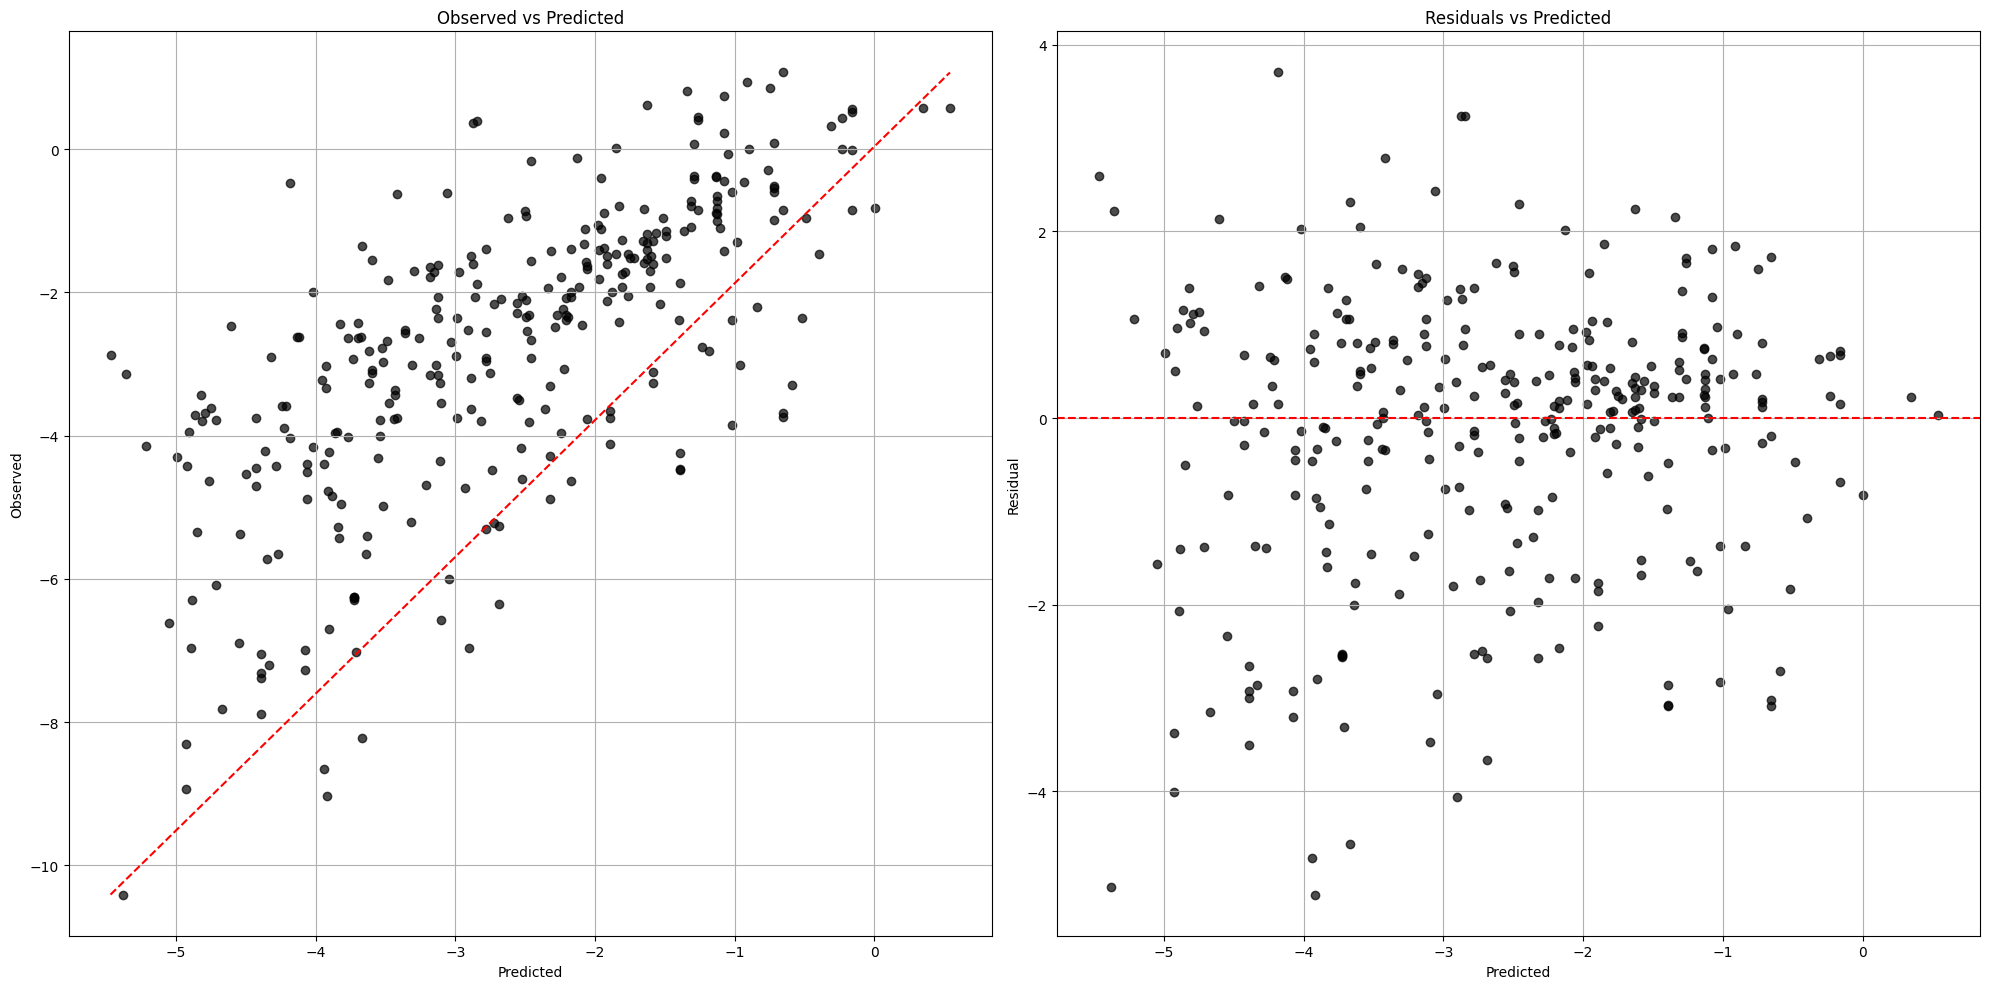


###########################
Utilizando NumNonHAtoms e NumNonHBonds
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

       Variáveis  Coeficientes
0    Intercepto      2.422404
1  NumNonHAtoms     -0.694561
2  NumNonHBonds     -1.002524 

Valor da aplicação no conjunto de teste
RMSE: 1.6510, R²: 0.3670
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.8486, R²: -2.9220
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 1.9096, R²: -2.9116
Média do cross-Validation feito criado por nós para 10 divisões
RMSE: 1.7006, R²: -12.4370
Média do cross-Validation função pré pronta para 10 divisões
RMSE: 1.7987, R²: -14.3115
----------------------------------------------
Regressão Linear Ordinária do  sklearn

        Variável  Coeficiente
0    Intercepto     2.422404
1  NumNonHAtoms    -0.694561
2  NumNonHBonds    -1.002524 

Valor da aplicação no conjunto de teste
RMSE: 1.6510, R²: 0.3670
M

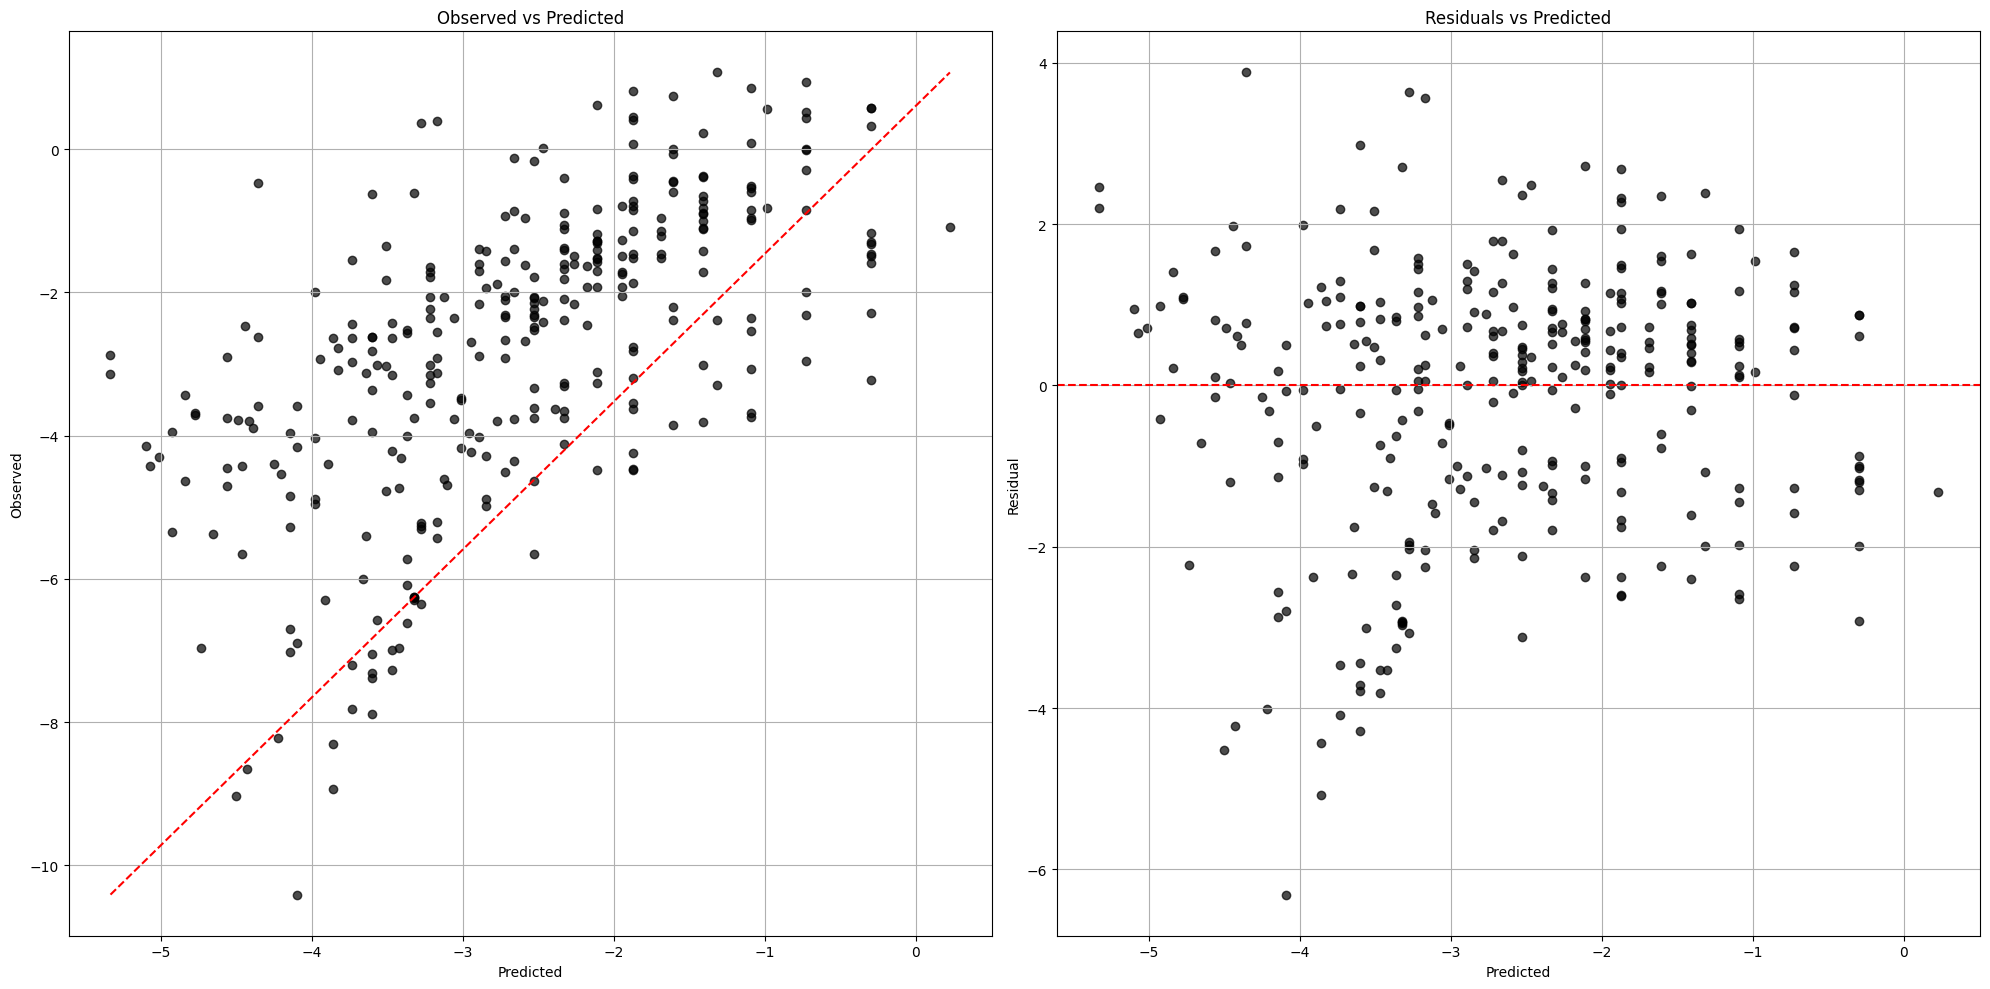


###########################
MolWeight, NumRings, NumCarbon, NumNonHBonds, SurfaceArea1
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

       Variáveis  Coeficientes
0    Intercepto      6.753248
1     MolWeight     -0.993271
2      NumRings      1.009823
3     NumCarbon      0.399883
4  NumNonHBonds     -2.575995
5  SurfaceArea1      0.340335 

Valor da aplicação no conjunto de teste
RMSE: 0.9243, R²: 0.8016
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 1.0115, R²: -0.1439
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 1.0213, R²: -0.1480
Média do cross-Validation feito criado por nós para 10 divisões
RMSE: 0.9858, R²: -4.7909
Média do cross-Validation função pré pronta para 10 divisões
RMSE: 0.9984, R²: -5.9727
----------------------------------------------
Regressão Linear Ordinária do  sklearn

        Variável  Coeficiente
0    Intercepto     6.753248
1     MolWeight   

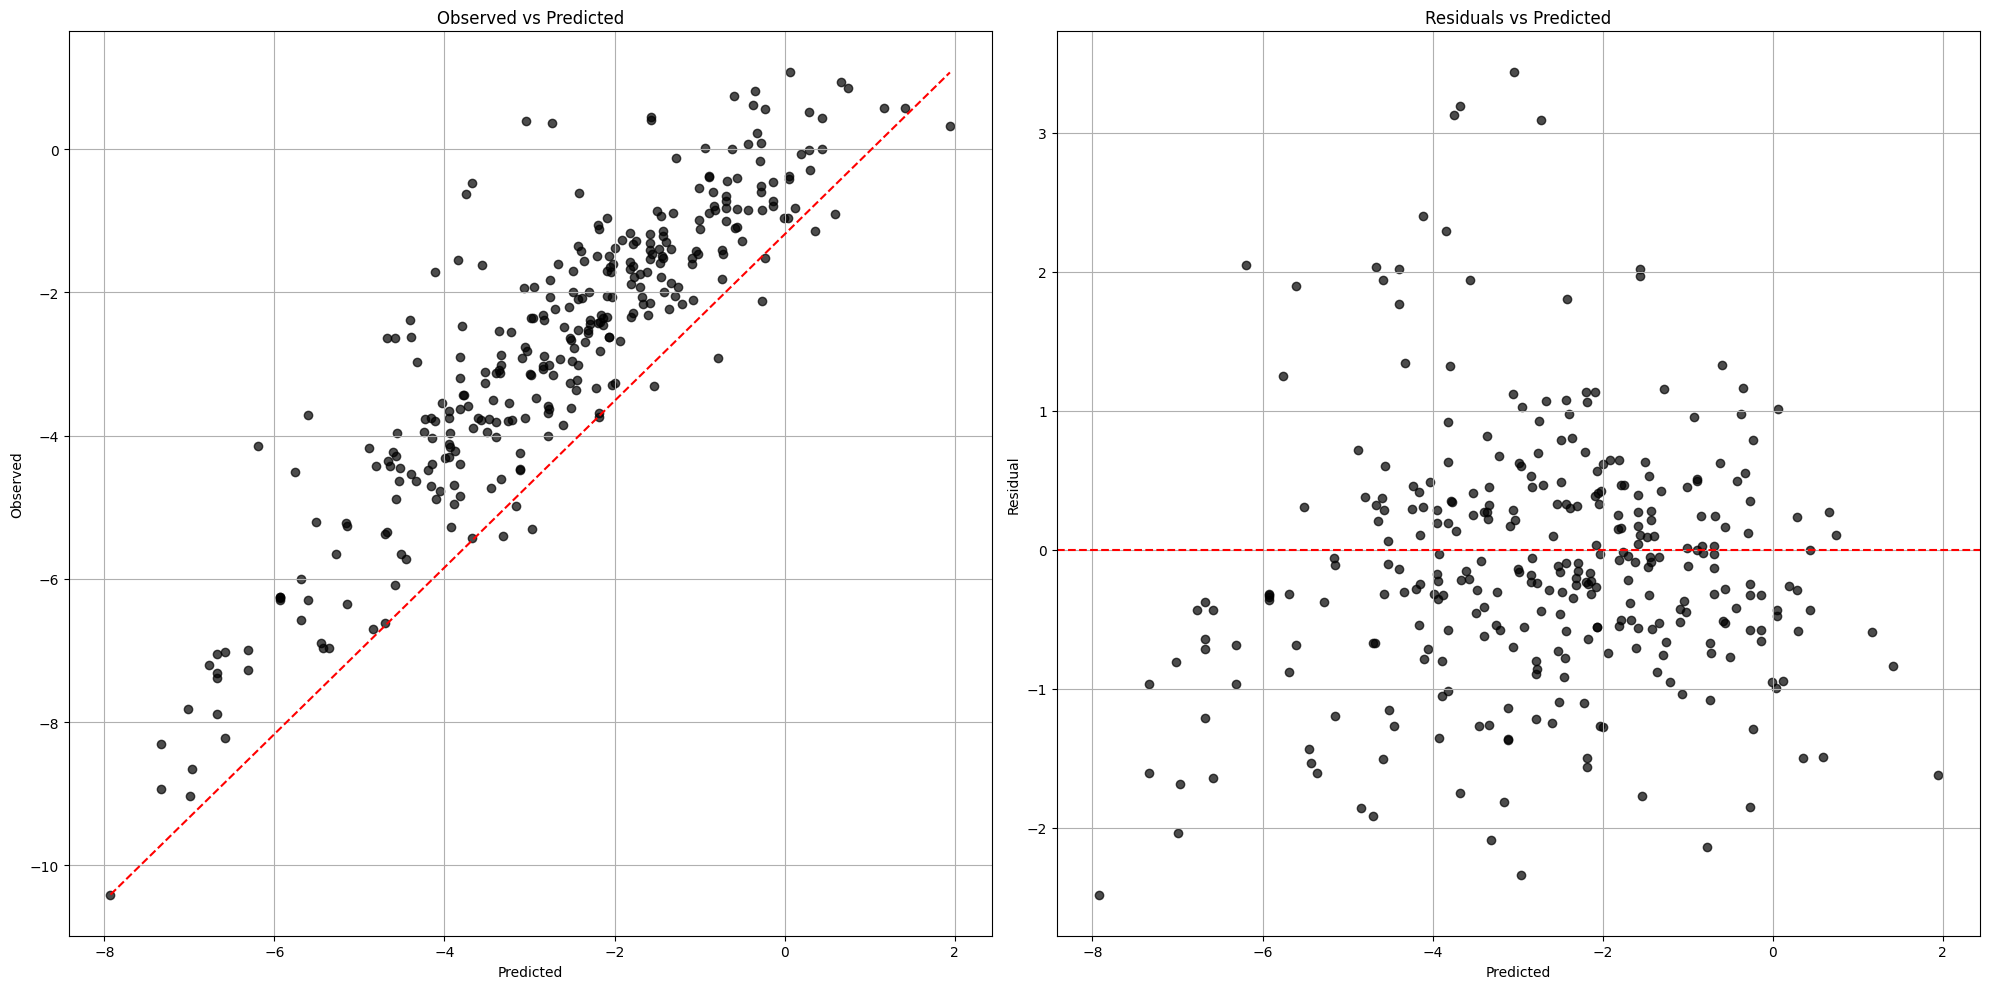


###########################
Utilizando as colunas contínuas
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

             Variáveis  Coeficientes
0          Intercepto      9.153999
1           MolWeight     -1.708279
2            NumAtoms     -5.631929
3        NumNonHAtoms     10.159387
4            NumBonds     -0.214653
5        NumNonHBonds     -5.216515
6        NumMultBonds     -0.529740
7         NumRotBonds     -0.176588
8         NumDblBonds     -0.502865
9    NumAromaticBonds      0.473555
10        NumHydrogen      1.355248
11          NumCarbon     -0.090817
12        NumNitrogen      1.583168
13          NumOxygen      1.136746
14          NumSulfer     -0.736857
15        NumChlorine     -0.927941
16         NumHalogen      0.469681
17           NumRings      1.660774
18  HydrophilicFactor     -0.162340
19       SurfaceArea1      0.105274
20       SurfaceArea2      0.067348 

Valor da aplicação no conj

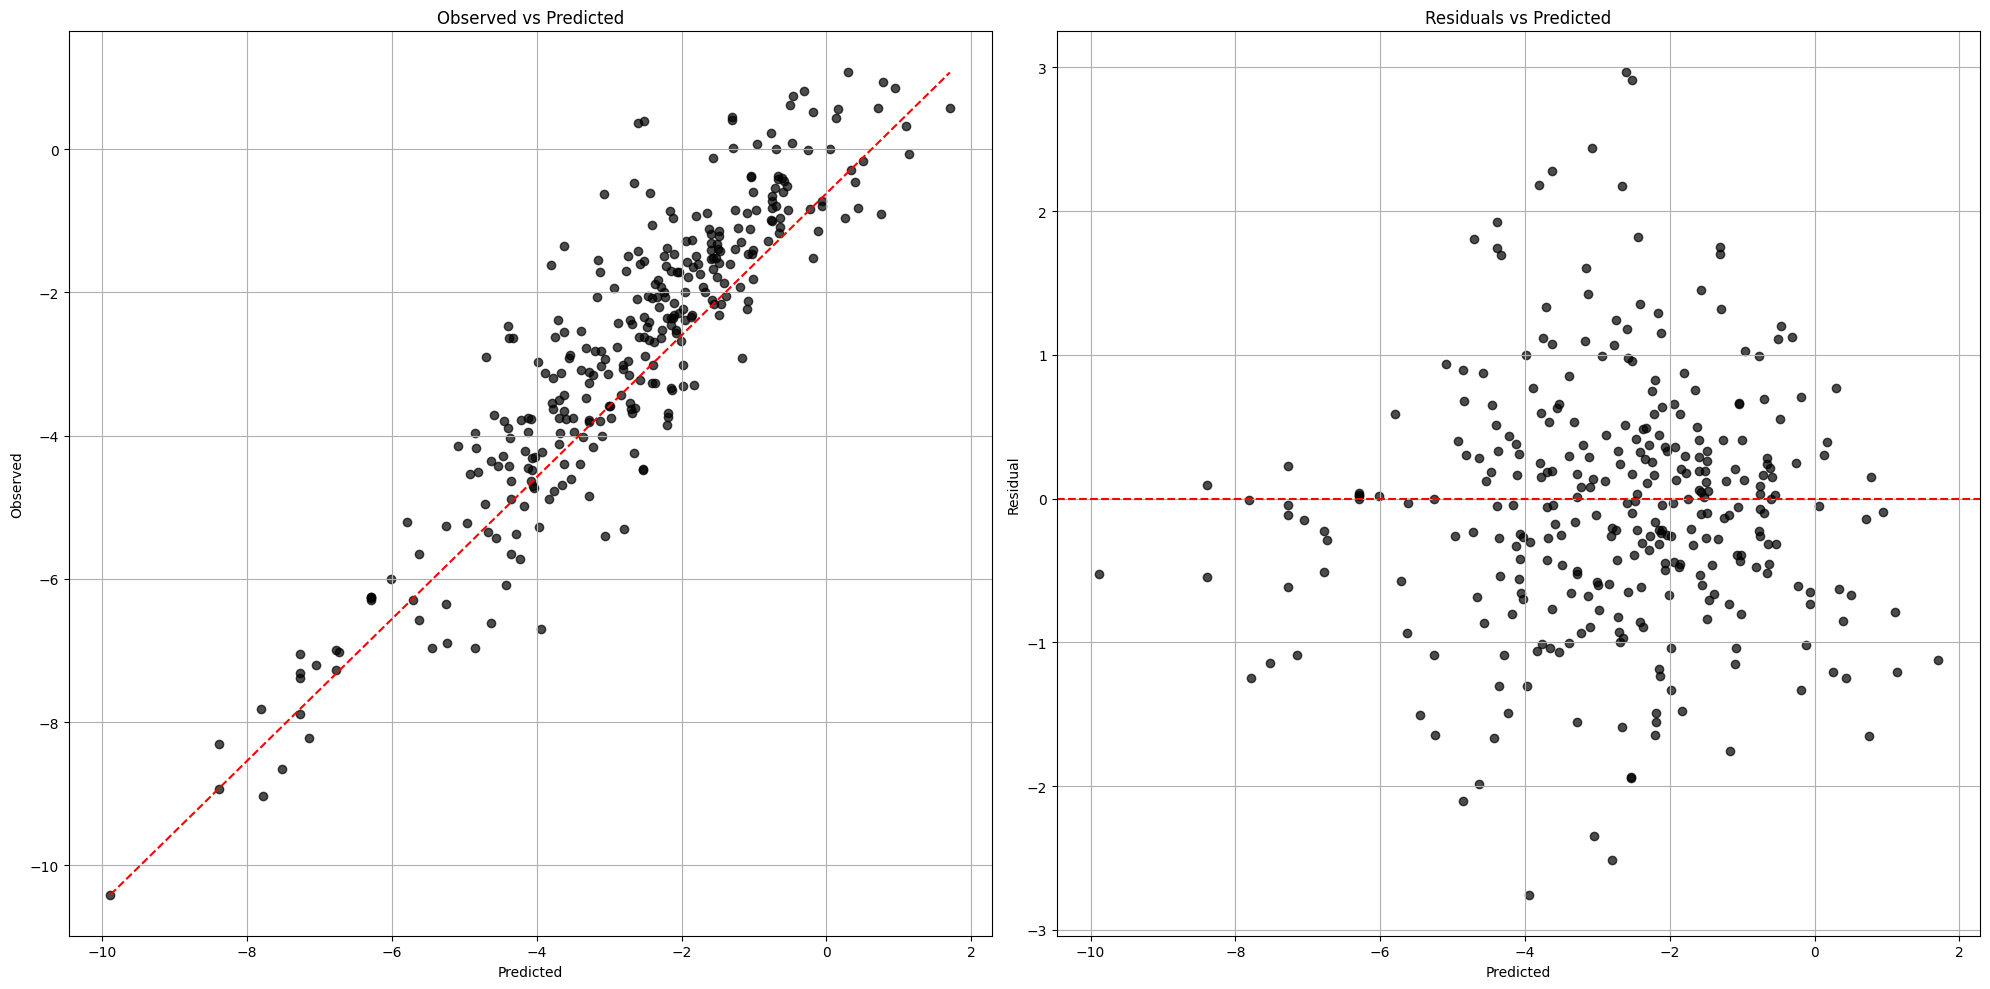


###########################
Utilizando colunas filtradas por correlação
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

              Variáveis  Coeficientes
0           Intercepto     12.984831
1                FP001      0.420227
2                FP002      0.023437
3                FP003     -0.107749
4                FP006     -0.164565
..                 ...           ...
154              FP206      0.022506
155          MolWeight     -2.241082
156           NumAtoms     -1.592328
157        NumRotBonds     -0.320461
158  HydrophilicFactor      0.605032

[159 rows x 2 columns] 

Valor da aplicação no conjunto de teste
RMSE: 0.8075, R²: 0.8486
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 0.8879, R²: 0.1483
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 0.8946, R²: 0.1442
Média do cross-Validation feito criado por nós para 10 divisões
RMSE: 0.8340, R²: -3.2780
Média do c

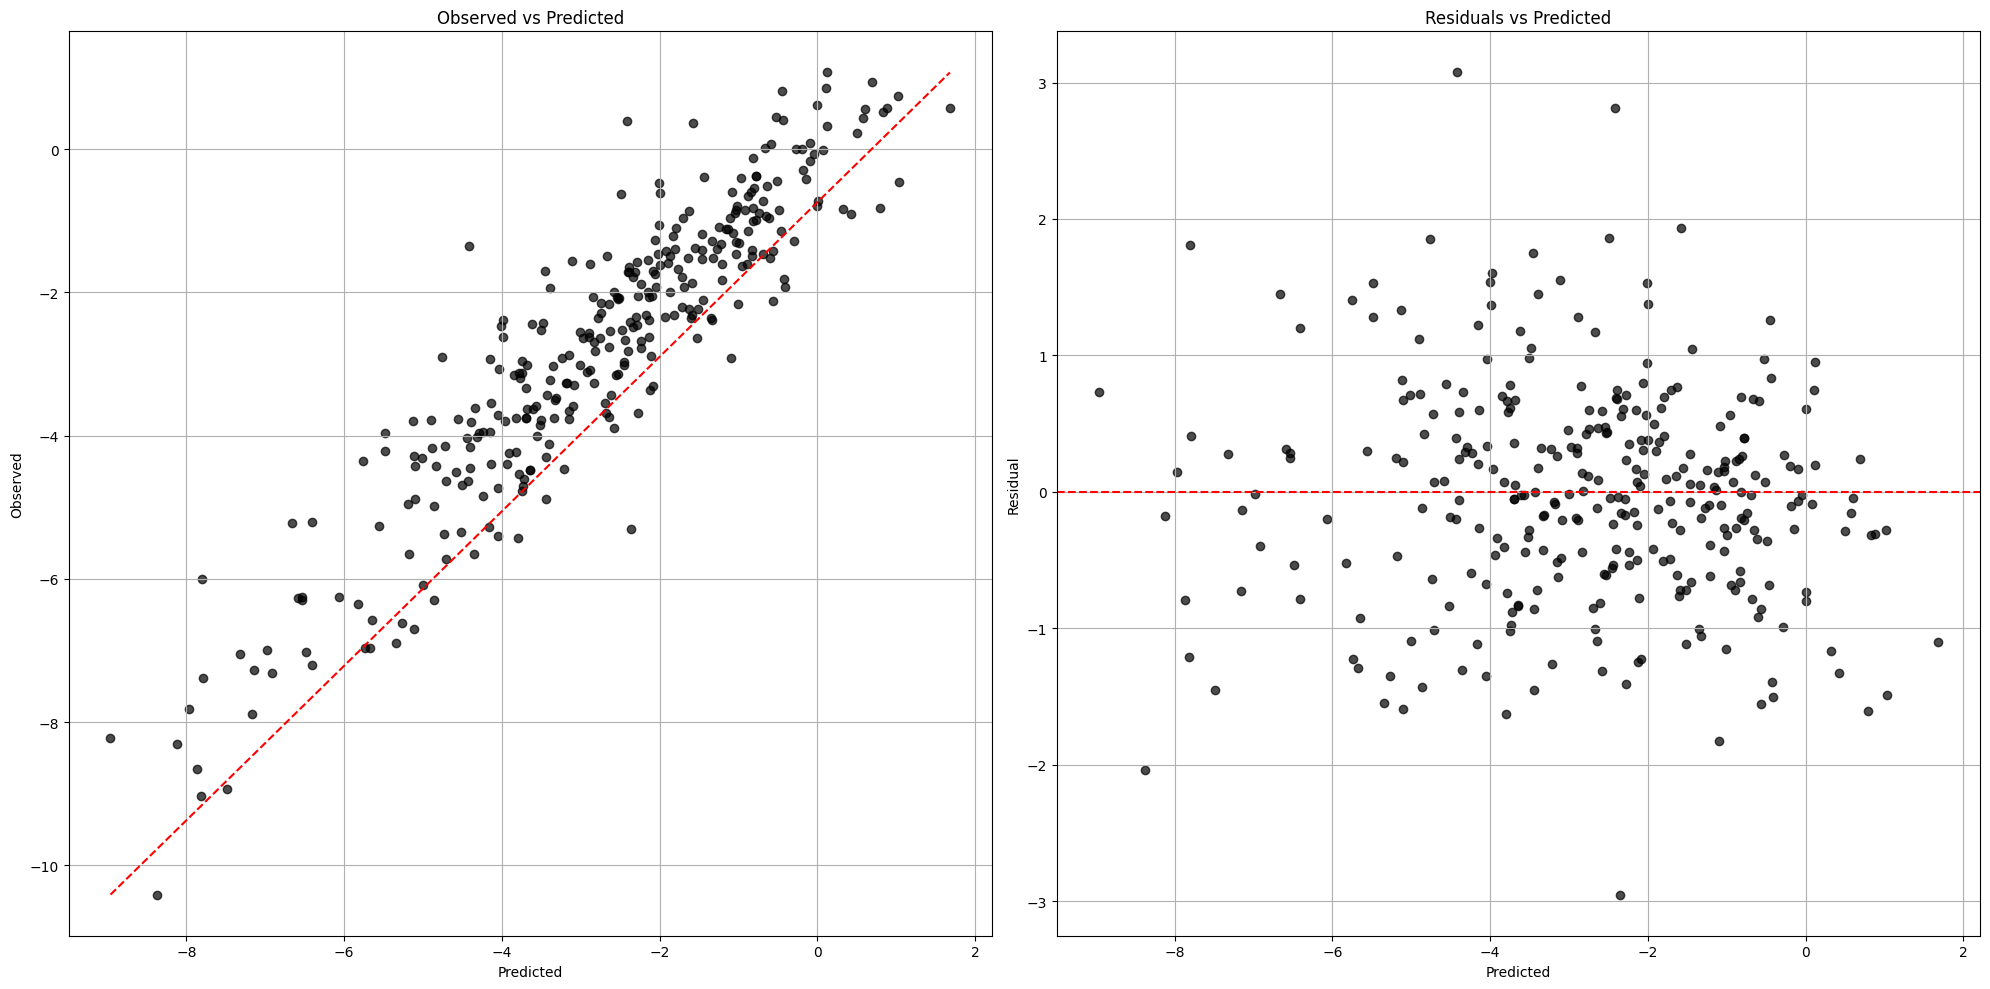


###########################
Utilizando todas as colunas
###########################

----------------------------------------------
Regressão Linear Ordinária feita por nós

              Variáveis  Coeficientes
0           Intercepto      2.430707
1                FP001      0.359364
2                FP002      0.145596
3                FP003     -0.039693
4                FP004     -0.304894
..                 ...           ...
224         NumHalogen      1.408117
225           NumRings      1.276494
226  HydrophilicFactor      0.010989
227       SurfaceArea1      0.088248
228       SurfaceArea2      0.095553

[229 rows x 2 columns] 

Valor da aplicação no conjunto de teste
RMSE: 0.7456, R²: 0.8709
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 41823064233986.8594, R²: -11228742659543457551335030784.0000
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 4874979946315.8867, R²: -31147340186495590405767168.0000
Média do cross-Validation feito cria

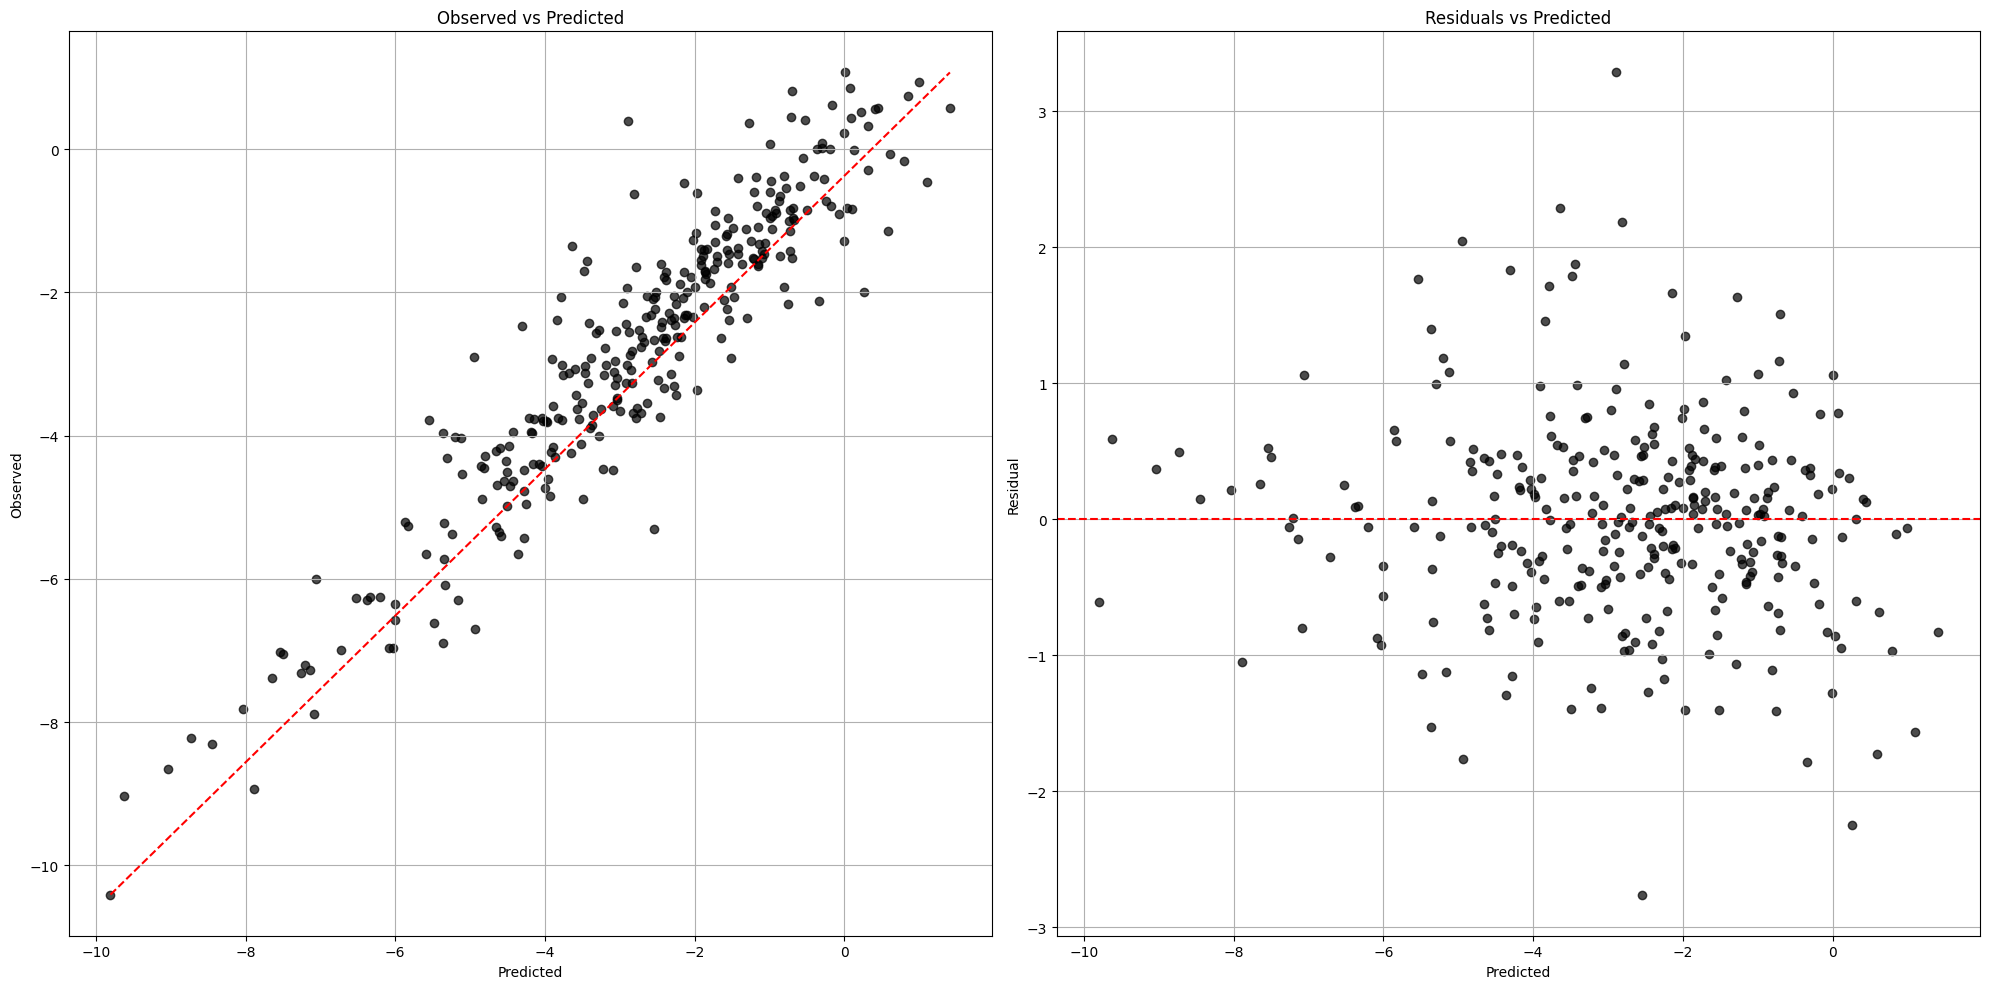

In [21]:
k = [5,10]
y = Y
yt = Ytest
repeticoes = len(testes['Treino'])
for i in range(repeticoes):
    print('\n###########################')
    print(testes['Descricao'][i])
    print('###########################\n')
    x = pd.DataFrame(list_x[i])
    xt = pd.DataFrame(list_xt[i])
    procedimentos_parte_1(x,y,xt,yt,k)

# Parte 2 - Ridge

In [22]:
class MyRidge(BaseEstimator, RegressorMixin):
    """
    Classe criada para realizar o a Regressão Linear Ridge. 
    Essa classe segue o mesmo padrão da Ridge da biblioteca do sklearn 
    """

    # Inicialização da classe
    def __init__(self, penal):
        """.
        Args:
            penal: A constante de penalização do Ridge
        """
        self.coef = None
        self.descricao = None
        self.penal = penal
        pass

    def fit(self, entrada, saida):
        """
        Ajusta o modelo Ridge com os dados de entrada (x) e saída (y).

        Args:
            Entrada: Os dados de Entrada para treinar o modelo e achar os parametros.
            Saída: Os dados de saída do dataset para treinar o modelo e achar os parametros.

        Return:
            Retorna o modelo
        """
        x = entrada.copy()
        x.insert(0, 'Intercepto', 1)
        colunas_total = x.columns.tolist()
        x = np.array(x)
        y = np.array(saida)
        self.coef = np.linalg.inv(x.T @ x + self.penal * np.eye(x.shape[1])) @ x.T @ y

        # Criação da descrição
        coef = {colunas_total[i]: self.coef[i] for i in range(len(self.coef))}
        self.descricao = pd.DataFrame(list(coef.items()), columns=['Variáveis', 'Coeficientes'])
        self.descricao['Coeficientes'] = self.descricao['Coeficientes'].apply(lambda x: round(x[0], 3))
        return self

    def predict(self, entrada):
        """
        Faz previsões usando os coeficientes do modelo ajustado.

        Args:
            Entrada: Os dados de Entrada para realizar a previsão.

        Return:
            Retorna a previsão para os dados de entrada.
        """
        x = entrada.copy()
        x.insert(0, 'Intercepto', 1)
        x = np.array(x)
        return x @ self.coef

    def get_descricao(self):
        """
        Retorna a tabela de descrições dos coeficientes.
        """
        return self.descricao

    def get_coef(self):
        """
        Retorna os coeficientes da Ridge.
        """
        return self.coef

In [35]:
def procedimentos_parte_2(x,y,xt,yt,k,lambdas):
    """
    Função que realiza todo o procedimento da parte 2:
     - Encontra o lamba que melhor penaliza o modelo e resulta no menor RMSE.
     - Plota o gráfico para que mostrar o melhor lambda.
     - Ajusta o melhor modelo e realiza as previsões tanto com nossa função Ridge como a função Ridge do sklearn para comparação.
     - Para cada modelo do Ridge realiza o cross-validation para verificar o desempenho do modelo (RMSE e R² como parametros de acurracy).
     - Plota os coeficientes da Regressão Linear.
     - Plota os gráficos de Observed x Prevised e Residual Error.
    
    Args:
        x: Dados de Entrada para treino
        y: Dados de Saída para treino
        xt: Dados de Entrada para teste
        yt: Dados de Saída para teste
        k: Divisão para cross-validation
        lambdas: Vetor com vários valores de lambda para cross validation
    """

    #------------------------------------------------ Encontrando o melhor Lambda --------------------------------------------------------#
    resultado = [] # Vetor para encontrar o melhor lambda

    # lambdas -> valores de lambda para testar
    for l in lambdas:
        # Ajustar o modelo Ridge
        modelo = MyRidge(penal=l)
        rmse_cv, r2_cv = cross_validation_scratch(modelo, x, y, k)
        resultado.append({'Lambda': l, 'R2_Mean': r2_cv, 'RMSE_Mean': rmse_cv})
    
    # Converter os resultados para DataFrame
    result_df = pd.DataFrame(resultado)

    melhor_lambda_r2 = result_df.loc[result_df['R2_Mean'].idxmax(), 'Lambda']    # Encontrar o melhor alpha com base no R²
    melhor_lambda_rmse = result_df.loc[result_df['RMSE_Mean'].idxmin(), 'Lambda']    # Encontrar o melhor alpha com base no RMSE


    print(f'Lamba que otimiza o RMSE: {melhor_lambda_rmse}')
    print(f'Lamba que otimiza o R²: {melhor_lambda_r2}')
    
    # Plotando os resultados
    plt.figure(figsize=(12, 6))

    # R² vs Alpha
    plt.subplot(1, 2, 1)
    plt.plot(result_df['Lambda'], result_df['R2_Mean'])
    plt.xlabel('Lambda')
    plt.ylabel('R² Média')
    plt.title('R² Média vs Lambda')

    # RMSE vs Alpha
    plt.subplot(1, 2, 2)
    plt.plot(result_df['Lambda'], result_df['RMSE_Mean'])
    plt.xlabel('Lambda')
    plt.ylabel('RMSE Média')
    plt.title('RMSE Médio vs Lambda')

    plt.tight_layout()
    plt.show()
    #-------------------------------------------------------------------------------------------------------------------------------------#

    #------------------------------------------ Meu Modelo X Modelo Biblioteca Sklearn ---------------------------------------------------#
    print('----------------------------------------------')
    print('Regressão Linear Ridge feita por nós')
    
    # Fit e Predict
    #######################################################
    modelo = MyRidge(penal=melhor_lambda_rmse) # Construindo modelo
    modelo.fit(x,y) 
    y_pred = modelo.predict(xt)
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    #######################################################
    
    # Previsão
    #######################################################
    descricao = modelo.get_descricao() # Coeficientes da regressão linear
    print('\n',descricao,'\n')
    print('Valor da aplicação no conjunto de teste')
    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    #######################################################
    
    # Cross-validation scratch
    ########################################################
    rmse_cv, r2_cv = cross_validation_scratch(modelo, x, y, k)
    print(f"Média do cross-Validation feito criado por nós para {k} divisões")
    print(f"RMSE: {rmse_cv:.4f}, R²: {r2_cv:.4f}")
    ########################################################
    
    # Cross-validation pre-build
    ########################################################
    r2_build = cross_val_score(modelo, x, y, cv=k, scoring='r2').mean()
    rmse_build = np.sqrt(-cross_val_score(modelo, x, y, cv=k, scoring='neg_mean_squared_error').mean())
    print(f"Média do cross-Validation função pré pronta para {k} divisões")
    print(f"RMSE: {rmse_build:.4f}, R²: {r2_build:.4f}")
    ########################################################

    predito = y_pred
    observado = yt
    residual = observado - predito

     #-------------------------------------------------------------------------------------------------------------------------------------#
    
    #sklearn
    print('----------------------------------------------')
    print('Regressão Linear Ordinária do  sklearn')
    
    # Fit e Predict
    #######################################################
    modelo = Ridge(alpha = melhor_lambda_rmse)
    modelo.fit(x, y)
    y_pred = modelo.predict(xt)
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    #######################################################

    # Plot da predição
    #######################################################
    # Pegando os coeficientes e fazendo uma relação com os respectivos preditores
    coef = {'Variável': x.columns, 'Coeficiente': modelo.coef_.flatten()}
    coef = pd.DataFrame(coef)
    intercepto = {'Variável': 'Intercepto', 'Coeficiente': np.array(modelo.intercept_).item()}
    descricao = pd.concat([pd.DataFrame([intercepto]), coef], ignore_index=True)
    print('\n',descricao,'\n')
    print('Valor da aplicação no conjunto de teste')
    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    #######################################################


    # Cross-validation scratch
    ########################################################
    rmse_cv, r2_cv = cross_validation_scratch(modelo, x, y, k)
    print(f"Média do cross-Validation feito criado por nós para {k} divisões")
    print(f"RMSE: {rmse_cv:.4f}, R²: {r2_cv:.4f}")
    ########################################################
    
    # Cross-validation pre-build
    ########################################################
    r2_build = cross_val_score(modelo, x, y, cv=k, scoring='r2').mean()
    rmse_build = np.sqrt(-cross_val_score(modelo, x, y, cv=k, scoring='neg_mean_squared_error').mean())
    print(f"Média do cross-Validation função pré pronta para {k} divisões")
    print(f"RMSE: {rmse_build:.4f}, R²: {r2_build:.4f}")
    ########################################################
    #-------------------------------------------------------------------------------------------------------------------------------------#
    #---------------------------------------------- Plot da accuracy dos modelos ---------------------------------------------------------#
    
    plt.figure(figsize=(20, 10))

    # Gráfico 1: Observado vs. Predito
    plt.subplot(1, 2, 1)
    plt.scatter(predito, observado, alpha=0.7, color='black')
    plt.plot([predito.min(), predito.max()], [observado.min(), observado.max()], color='red', linestyle='--')
    plt.title("Observed vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Observed")
    plt.grid(True)
    
    # Gráfico 2: Resíduos vs. Predito
    plt.subplot(1, 2, 2)
    plt.scatter(predito, residual, alpha=0.7, color='black')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title("Residuals vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.grid(True)
    
    # Mostrar os gráficos
    plt.tight_layout()
    plt.show()
    #-------------------------------------------------------------------------------------------------------------------------------------#


###########################
Utilizando as colunas contínuas
###########################

Lamba que otimiza o RMSE: 0.203010101010101
Lamba que otimiza o R²: 0.405020202020202


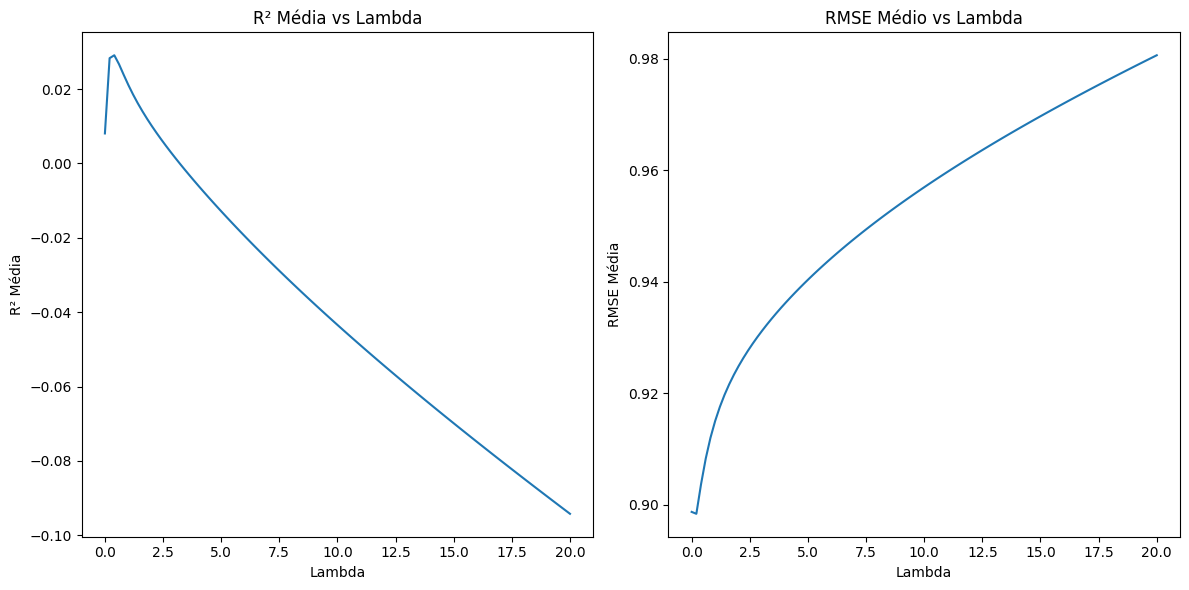

----------------------------------------------
Regressão Linear Ridge feita por nós

             Variáveis  Coeficientes
0          Intercepto         7.509
1           MolWeight        -1.159
2            NumAtoms        -1.064
3        NumNonHAtoms         4.102
4            NumBonds        -2.034
5        NumNonHBonds        -2.879
6        NumMultBonds        -0.439
7         NumRotBonds        -0.245
8         NumDblBonds        -0.404
9    NumAromaticBonds         0.488
10        NumHydrogen         0.919
11          NumCarbon        -0.312
12        NumNitrogen         1.441
13          NumOxygen         1.064
14          NumSulfer        -1.111
15        NumChlorine        -0.659
16         NumHalogen         0.169
17           NumRings         1.253
18  HydrophilicFactor        -0.189
19       SurfaceArea1         0.115
20       SurfaceArea2         0.083 

Valor da aplicação no conjunto de teste
RMSE: 0.8876, R²: 0.8170
Média do cross-Validation feito criado por nós para 5 d

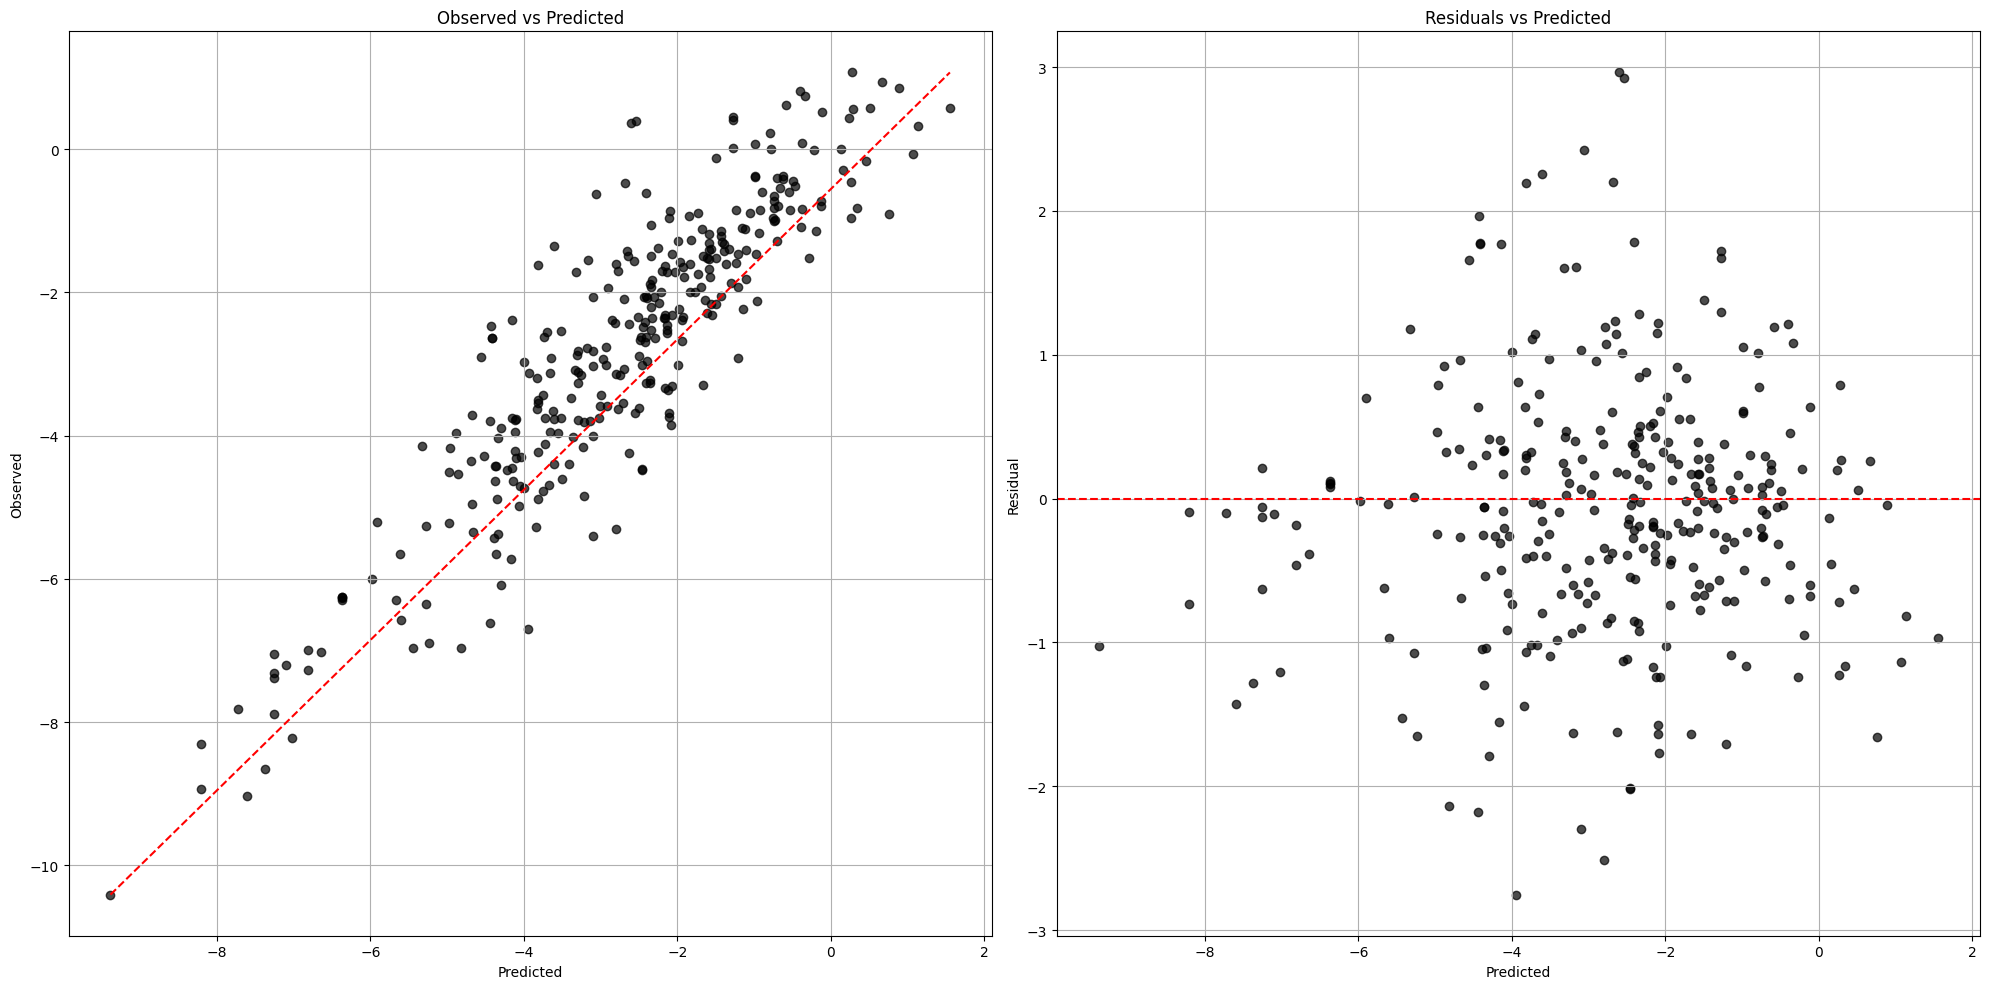


###########################
Utilizando colunas filtradas por correlação
###########################

Lamba que otimiza o RMSE: 0.001
Lamba que otimiza o R²: 0.203010101010101


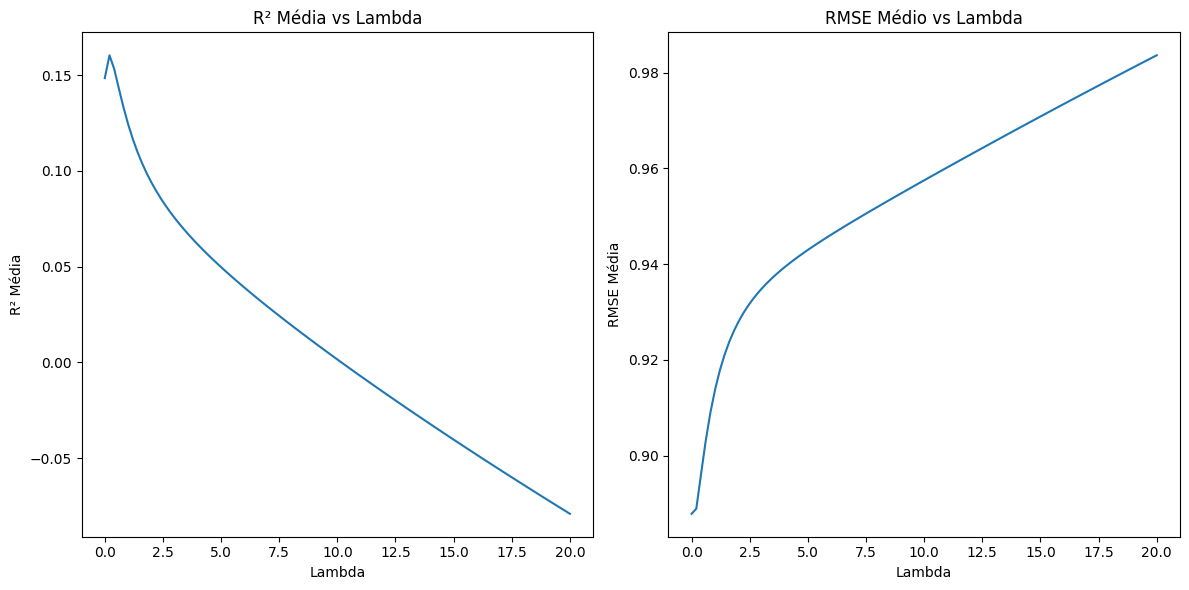

----------------------------------------------
Regressão Linear Ridge feita por nós

              Variáveis  Coeficientes
0           Intercepto        12.969
1                FP001         0.420
2                FP002         0.024
3                FP003        -0.108
4                FP006        -0.164
..                 ...           ...
154              FP206         0.022
155          MolWeight        -2.239
156           NumAtoms        -1.590
157        NumRotBonds        -0.322
158  HydrophilicFactor         0.605

[159 rows x 2 columns] 

Valor da aplicação no conjunto de teste
RMSE: 0.8075, R²: 0.8486
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 0.8879, R²: 0.1484
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 0.8946, R²: 0.1444
----------------------------------------------
Regressão Linear Ordinária do  sklearn

              Variável  Coeficiente
0           Intercepto    12.984361
1                FP001     0.420207
2          

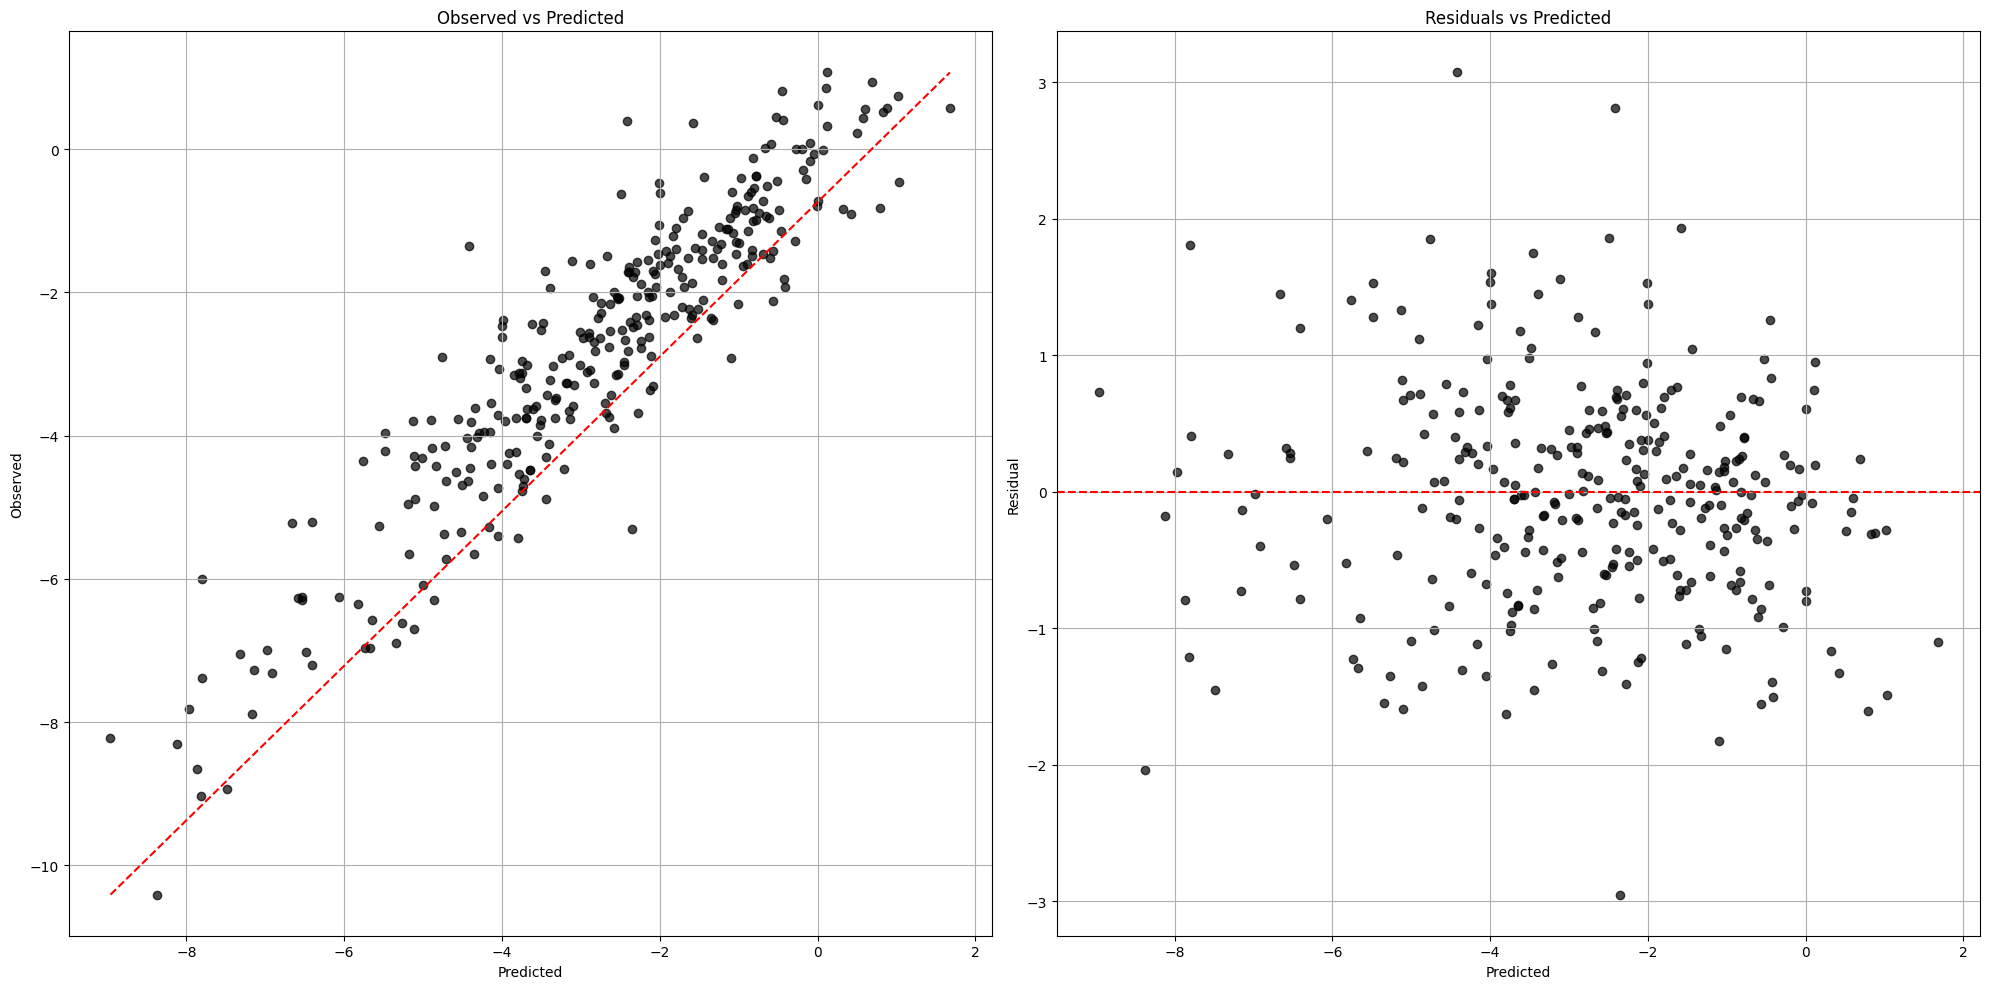


###########################
Utilizando todas as colunas
###########################

Lamba que otimiza o RMSE: 4.243212121212121
Lamba que otimiza o R²: 4.243212121212121


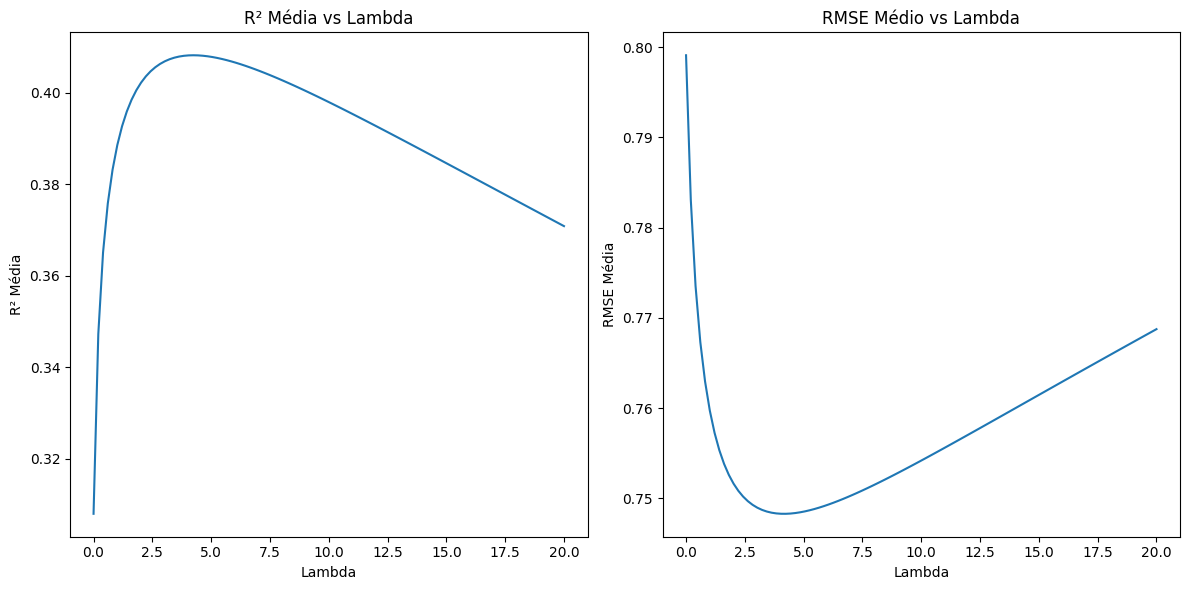

----------------------------------------------
Regressão Linear Ridge feita por nós

              Variáveis  Coeficientes
0           Intercepto         0.856
1                FP001        -0.000
2                FP002         0.496
3                FP003        -0.145
4                FP004        -0.254
..                 ...           ...
224         NumHalogen        -0.230
225           NumRings        -0.404
226  HydrophilicFactor        -0.213
227       SurfaceArea1         0.324
228       SurfaceArea2         0.000

[229 rows x 2 columns] 

Valor da aplicação no conjunto de teste
RMSE: 0.7305, R²: 0.8761
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 0.7483, R²: 0.4082
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 0.7575, R²: 0.4061
----------------------------------------------
Regressão Linear Ordinária do  sklearn

               Variável  Coeficiente
0           Intercepto     6.925685
1                FP001     0.037064
2         

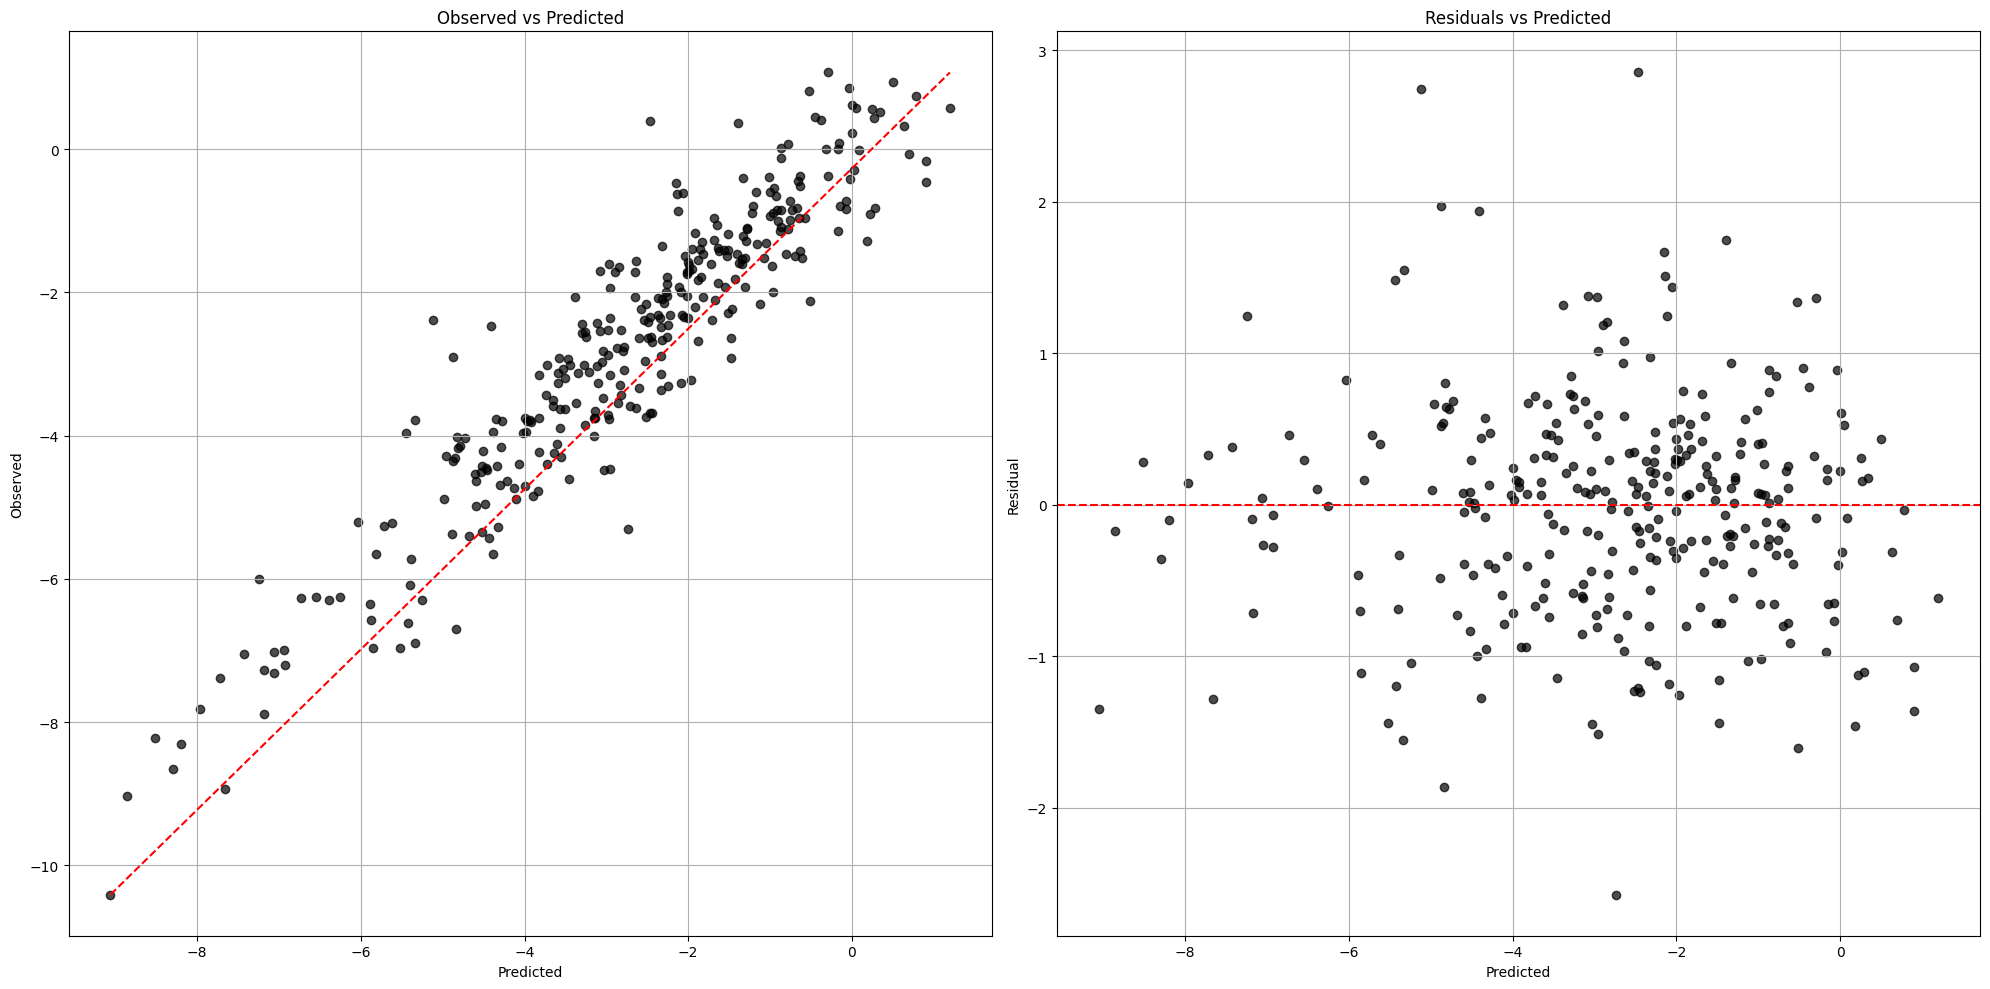

In [36]:
k = 5
y = Y
yt = Ytest
repeticoes = len(testes['Treino'])
lambdas = np.linspace(0.001, 20, 100)
for i in range(5,repeticoes):
    print('\n###########################')
    print(testes['Descricao'][i])
    print('###########################\n')
    x = pd.DataFrame(list_x[i])
    xt = pd.DataFrame(list_xt[i])
    procedimentos_parte_2(x,y,xt,yt,k,lambdas)

# Parte 3 - Componentes Principais

In [25]:
def procedimentos_parte_3(x,y,xt,yt,k,num_comps):
    """
    Função que realiza todo o procedimento da parte 3:
    
    Args:
        x: Dados de Entrada para treino
        y: Dados de Saída para treino
        xt: Dados de Entrada para teste
        yt: Dados de Saída para teste
        k: Divisão para cross-validation
        lambdas: Vetor com vários valores de lambda para cross validation
    """
    resultadoPCA = []
    resultadoPLS = []
    for n in num_comps:
        pca = PCA(n_components=n)
        modeloPCA = LinearRegression()
        modeloPLS = PLSRegression(n_components=n)
        rmsePCA, r2PCA = cross_validation_scratch(modeloPCA, x, y, k, pca = pca)
        rmsePLS, r2PLS = cross_validation_scratch(modeloPLS, x, y, k)
        resultadoPCA.append({'Numero': n, 'R2_Mean': r2PCA, 'RMSE_Mean': rmsePCA})
        resultadoPLS.append({'Numero': n, 'R2_Mean': r2PLS, 'RMSE_Mean': rmsePLS})
    
    # Converter os resultados para DataFrame
    dfPCA = pd.DataFrame(resultadoPCA)
    dfPLS = pd.DataFrame(resultadoPLS)

    # Encontrar o melhor alpha com base no R² ou no RMSE
    melhor_PCA_r2 = dfPCA.loc[dfPCA['R2_Mean'].idxmax(), 'Numero']
    melhor_PCA_rmse = dfPCA.loc[dfPCA['RMSE_Mean'].idxmin(), 'Numero']
    # Encontrar o melhor alpha com base no R² ou no RMSE
    melhor_PLS_r2 = dfPLS.loc[dfPLS['R2_Mean'].idxmax(), 'Numero']
    melhor_PLS_rmse = dfPLS.loc[dfPLS['RMSE_Mean'].idxmin(), 'Numero']

    print(f'Numero de PCA que otimiza o RMSE: {melhor_PCA_rmse}')
    print(f'Numero de PCA otimiza o R²: {melhor_PCA_r2}')
    print(f'Numero de PLS que otimiza o RMSE: {melhor_PLS_rmse}')
    print(f'Numero de PLS que otimiza o R²: {melhor_PLS_r2}')
    
     # Plotagem
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(dfPCA['Numero'], dfPCA['RMSE_Mean'], color = 'red', label='PCA')
    plt.plot(dfPLS['Numero'], dfPLS['RMSE_Mean'], color = 'blue', label='PLS')
    plt.xlabel('Número de Componentes')
    plt.ylabel('RMSE')
    plt.title('Perfil de Validação Cruzada: RMSE')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(dfPCA['Numero'], dfPCA['R2_Mean'], color='red', label='PCA')
    plt.plot(dfPLS['Numero'], dfPLS['R2_Mean'], color = 'blue', label='PLS')
    plt.xlabel('Número de Componentes')
    plt.ylabel('R²')
    plt.title('Perfil de Validação Cruzada: R²')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Meu Modelo
    print('----------------------------------------------')
    print('Regressão Linear com PCA')
    
    # Fit e Predict
    #######################################################
    pca = PCA(n_components=melhor_PCA_rmse)
    modeloPCA = LinearRegression()
    pca.fit(x)
    xPCA = pd.DataFrame(pca.transform(x))
    xtPCA = pd.DataFrame(pca.transform(xt))
    modeloPCA.fit(xPCA,y)
    y_pred = modeloPCA.predict(xtPCA)
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    
    print('\nValor da aplicação no conjunto de teste')
    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    #######################################################
    
    # Cross-validation scratch
    ########################################################
    rmse_cv, r2_cv = cross_validation_scratch(modeloPCA, x, y, k,pca=pca)
    print(f"Média do cross-Validation feito criado por nós para {k} divisões")
    print(f"RMSE: {rmse_cv:.4f}, R²: {r2_cv:.4f}")
    ########################################################
    
    # Cross-validation pre-build
    ########################################################
    r2_build = cross_val_score(modeloPCA, xPCA, y, cv=k, scoring='r2').mean()
    rmse_build = np.sqrt(-cross_val_score(modeloPCA, xPCA, y, cv=k, scoring='neg_mean_squared_error').mean())
    print(f"Média do cross-Validation função pré pronta para {k} divisões")
    print(f"RMSE: {rmse_build:.4f}, R²: {r2_build:.4f}")
    ########################################################

    predito = y_pred
    observado = yt
    residual = observado - predito

    # Plot gráficos do erro
    plt.figure(figsize=(20, 10))

    # Gráfico 1: Observado vs. Predito
    plt.subplot(1, 2, 1)
    plt.scatter(predito, observado, alpha=0.7, color='black')
    plt.plot([predito.min(), predito.max()], [observado.min(), observado.max()], color='red', linestyle='--')
    plt.title("Observed vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Observed")
    plt.grid(True)
    
    # Gráfico 2: Resíduos vs. Predito
    plt.subplot(1, 2, 2)
    plt.scatter(predito, residual, alpha=0.7, color='black')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title("Residuals vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.grid(True)
    
    # Mostrar os gráficos
    plt.tight_layout()
    plt.show()

    #---------------------------------------------------------------------------------------------------------------#
    
    #sklearn
    print('----------------------------------------------')
    print('Regressão Linear com PLS')
    
    # Fit e Predict
    #######################################################
    modeloPLS = PLSRegression(n_components=melhor_PLS_rmse)
    modeloPLS.fit(x, y)
    y_pred = modeloPLS.predict(xt)
    rmse = calcular_rmse(yt, y_pred)
    r2 = calcular_r2(yt, y_pred)
    
    
    # Plot da predição
    print('\nValor da aplicação no conjunto de teste')
    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    #######################################################


    # Cross-validation scratch
    ########################################################
    rmse_cv, r2_cv = cross_validation_scratch(modeloPLS, x, y, k)
    print(f"Média do cross-Validation feito criado por nós para {k} divisões")
    print(f"RMSE: {rmse_cv:.4f}, R²: {r2_cv:.4f}")
    ########################################################
    
    # Cross-validation pre-build
    ########################################################
    r2_build = cross_val_score(modeloPLS, x, y, cv=k, scoring='r2').mean()
    rmse_build = np.sqrt(-cross_val_score(modeloPLS, x, y, cv=k, scoring='neg_mean_squared_error').mean())
    print(f"Média do cross-Validation função pré pronta para {k} divisões")
    print(f"RMSE: {rmse_build:.4f}, R²: {r2_build:.4f}")
    ########################################################

    predito = y_pred
    observado = yt
    residual = observado - predito
    
    # Plot gráficos do erro
    plt.figure(figsize=(20, 10))

    # Gráfico 1: Observado vs. Predito
    plt.subplot(1, 2, 1)
    plt.scatter(predito, observado, alpha=0.7, color='black')
    plt.plot([predito.min(), predito.max()], [observado.min(), observado.max()], color='red', linestyle='--')
    plt.title("Observed vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Observed")
    plt.grid(True)
    
    # Gráfico 2: Resíduos vs. Predito
    plt.subplot(1, 2, 2)
    plt.scatter(predito, residual, alpha=0.7, color='black')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title("Residuals vs Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.grid(True)
    
    # Mostrar os gráficos
    plt.tight_layout()
    plt.show()


###########################
Utilizando todas as colunas
###########################

Numero de PCA que otimiza o RMSE: 64
Numero de PCA otimiza o R²: 64
Numero de PLS que otimiza o RMSE: 18
Numero de PLS que otimiza o R²: 20


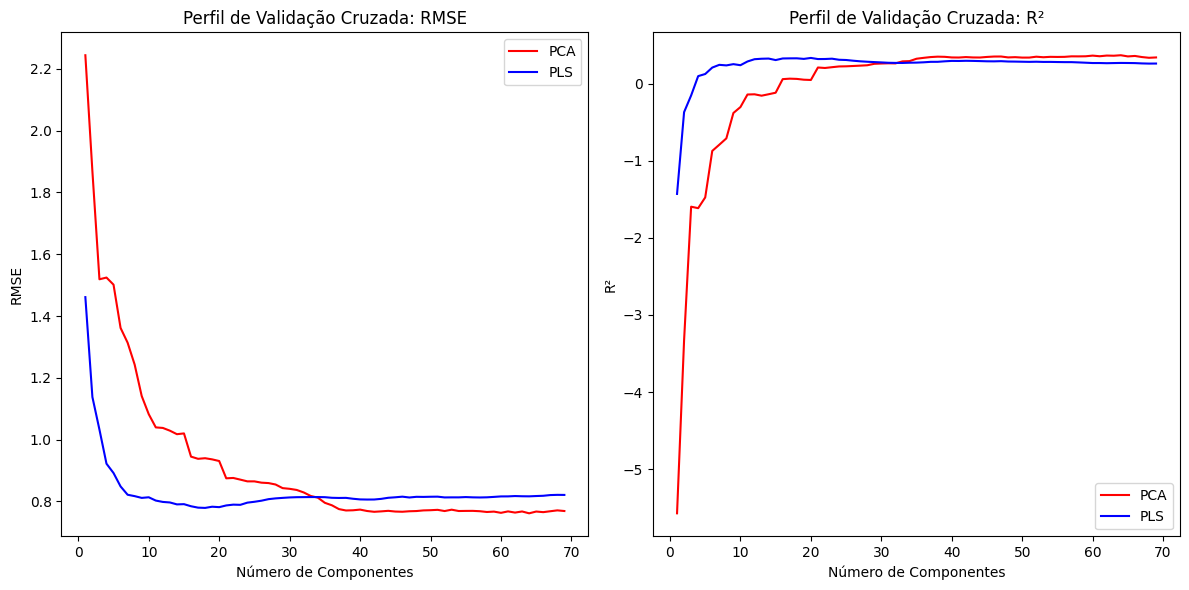

----------------------------------------------
Regressão Linear com PCA

Valor da aplicação no conjunto de teste
RMSE: 0.7786, R²: 0.8592
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 0.7664, R²: 0.3574
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 0.7795, R²: 0.3468


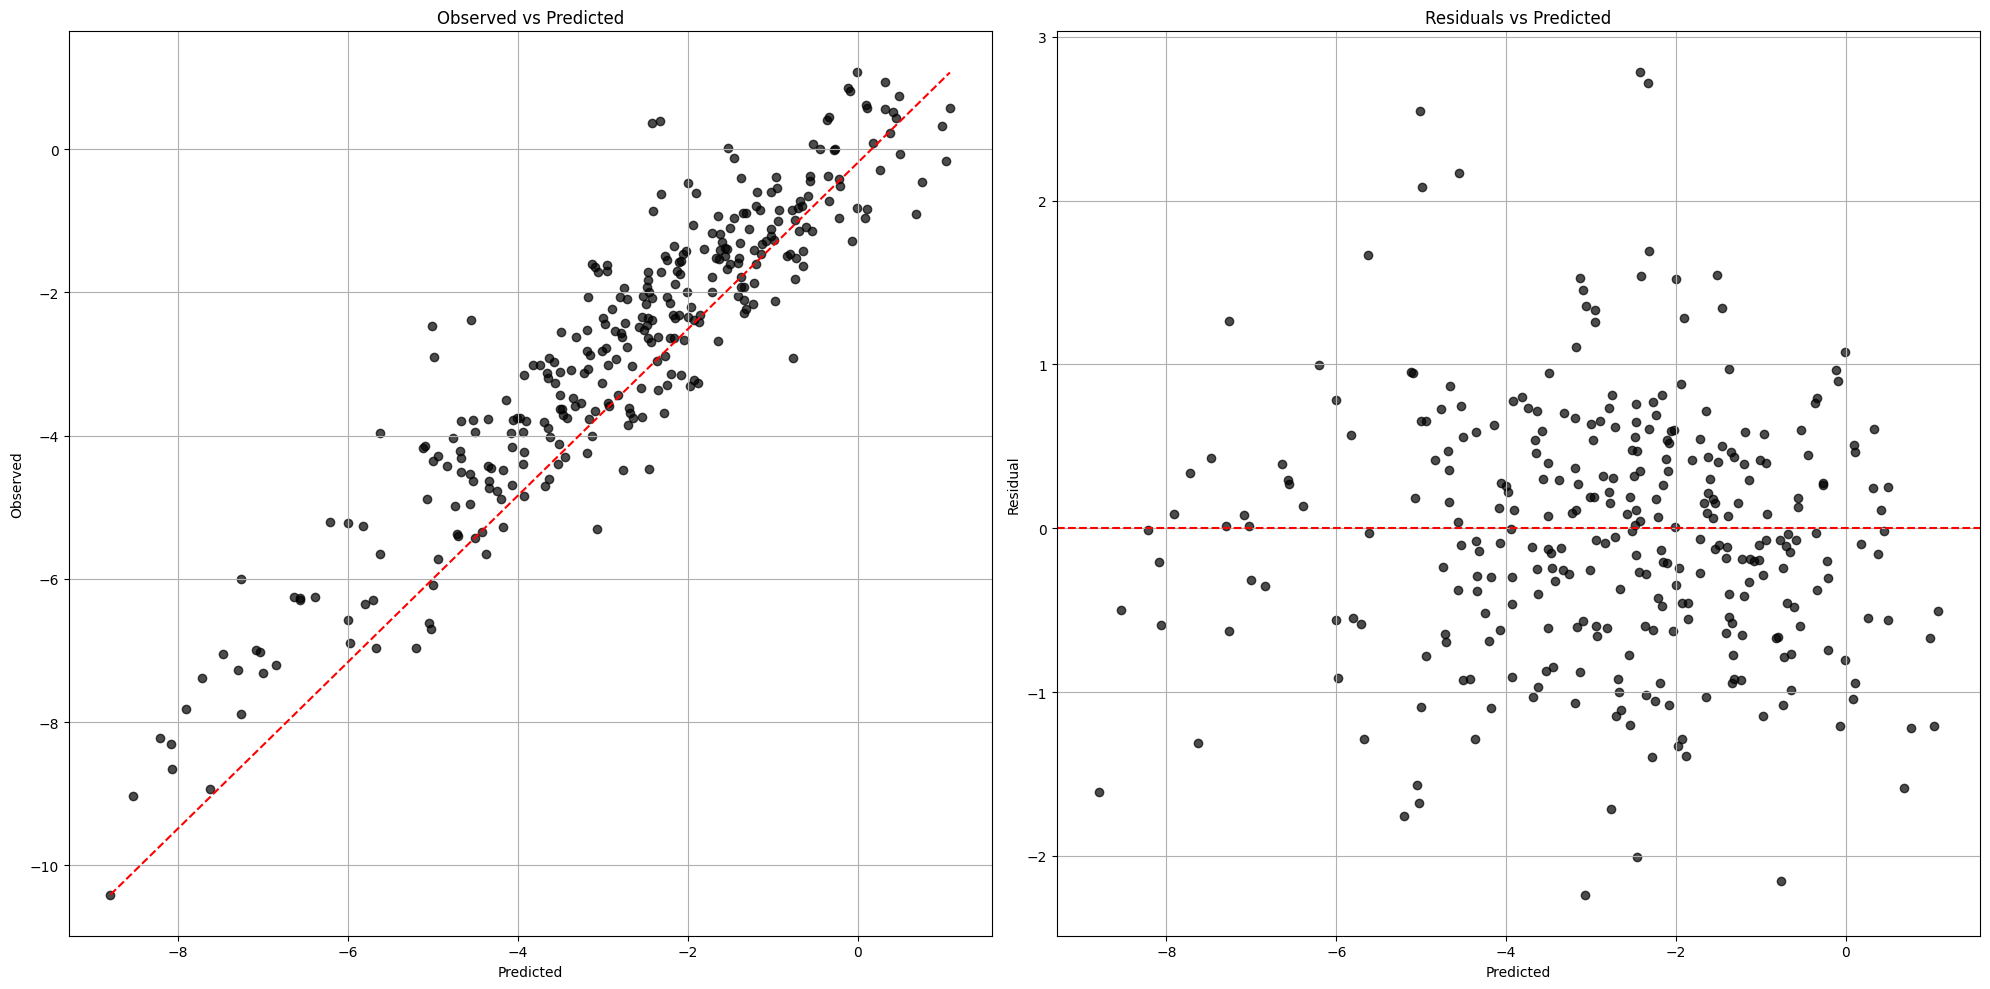

----------------------------------------------
Regressão Linear com PLS

Valor da aplicação no conjunto de teste
RMSE: 0.7296, R²: 0.8764
Média do cross-Validation feito criado por nós para 5 divisões
RMSE: 0.7786, R²: 0.3287
Média do cross-Validation função pré pronta para 5 divisões
RMSE: 0.7839, R²: 0.3260


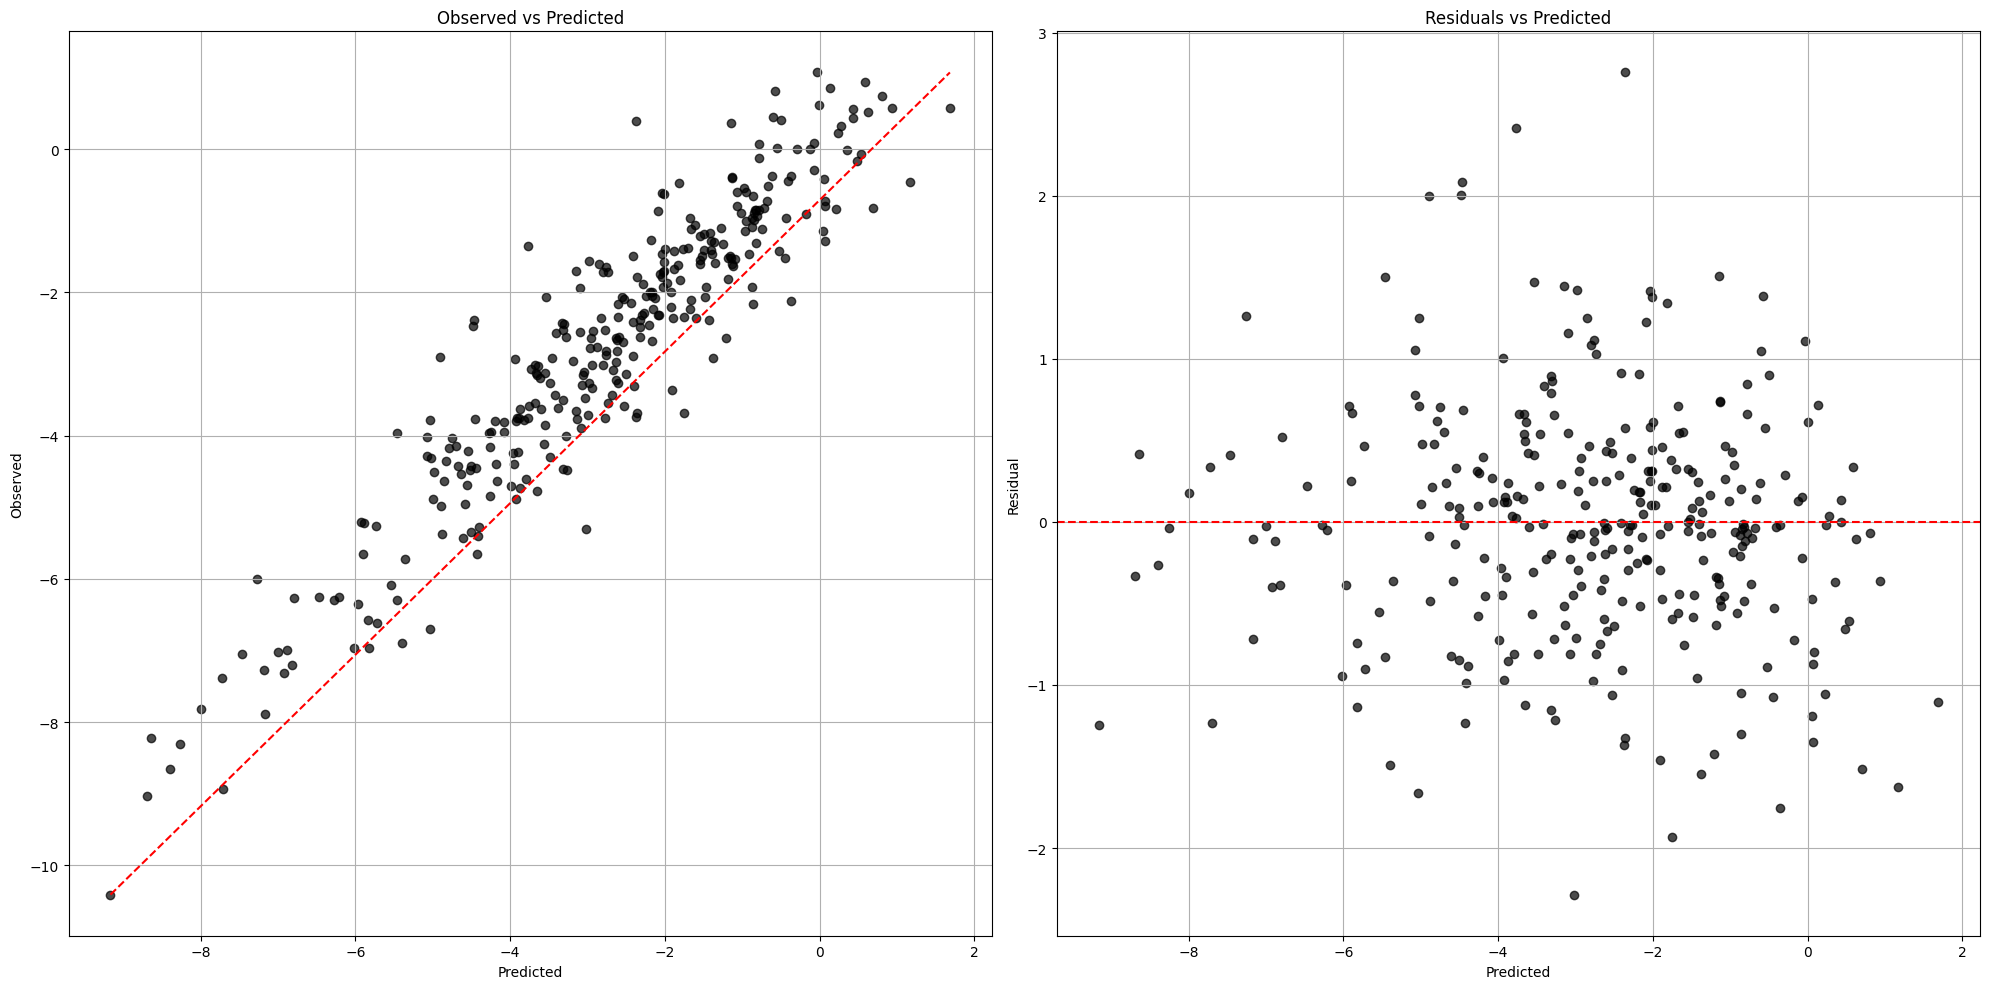

In [26]:
k = 5
y = Y
yt = Ytest
num_comps = range(1,70)
print('\n###########################')
print(testes['Descricao'][-1])
print('###########################\n')
x = pd.DataFrame(list_x[-1])
xt = pd.DataFrame(list_xt[-1])
procedimentos_parte_3(x,y,xt,yt,k,num_comps)

# Resumo Geral

In [27]:
x = XT
y = Y
xt = XTtest
yt = Ytest

#-----------------------------------------------------------------#
# OLS
# Fit e Predict
modelo = MyOLS()
modelo.fit(x,y)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('OLS padrão')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
# Ridge
modelo = MyRidge(penal = 4.243212121212121 )
modelo.fit(x,y)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('Ridge')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
# PCA
# Fit e Predict
pca = PCA(n_components = 61)
modelo = MyOLS()
# Criando os componentes principais
x_train_pca = pd.DataFrame(pca.fit_transform(x))
x_test_pca = pd.DataFrame(pca.transform(xt))
# Fit e Predict
modelo.fit(x_train_pca, y)
y_pred = modelo.predict(x_test_pca)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('PCA')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
# PLS
# Fit e Predict
modelo = PLSRegression(n_components = 18)
modelo.fit(x, y)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('PLS')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
#Rede Neural
modelo = Sequential([
  Input(shape=(x.shape[1],)),  # Dimensão de entrada
  Dense(90, activation ='sigmoid'),
  Dense(1)  # Saída única para regressão
])
modelo.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
modelo.fit(x, y, epochs=100, batch_size=32, verbose=0)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('Rede Neural')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#


------------------------------
OLS padrão
RMSE: 0.7456, R²: 0.8709
------------------------------
Ridge
RMSE: 0.7305, R²: 0.8761
------------------------------
PCA
RMSE: 0.7855, R²: 0.8567
------------------------------
PLS
RMSE: 0.7296, R²: 0.8764


2025-01-28 16:33:30.126150: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
------------------------------
Rede Neural
RMSE: 0.6699, R²: 0.8958


# Parte 4 - Rede Neural

In [28]:
#Rede Neural
k = 5
x = XT
y = Y
xt = XTtest
yt = Ytest

df = []
r2_funcs = []
rmse_funcs = []
num_neuronios = [60,70,80,90,100,110,120,130,140,150]
functions = ['relu','sigmoid','tanh'] 
for func in functions:
    rmse_list = []
    r2_list = []
    for n in num_neuronios:
        modelo = Sequential([
            Input(shape=(x.shape[1],)),  # Dimensão de entrada
            Dense(n, activation = func),
            Dense(1)  # Saída única para regressão
        ])
        modelo.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
        rmse,r2 = cross_validation_scratch(modelo, x, y, k, network = True)
        rmse_list.append(rmse)
        r2_list.append(r2)
        df.append({'Num':n , 'RMSE': rmse, 'R2': r2})
    r2_funcs.append(r2_list)
    rmse_funcs.append(rmse_list)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━

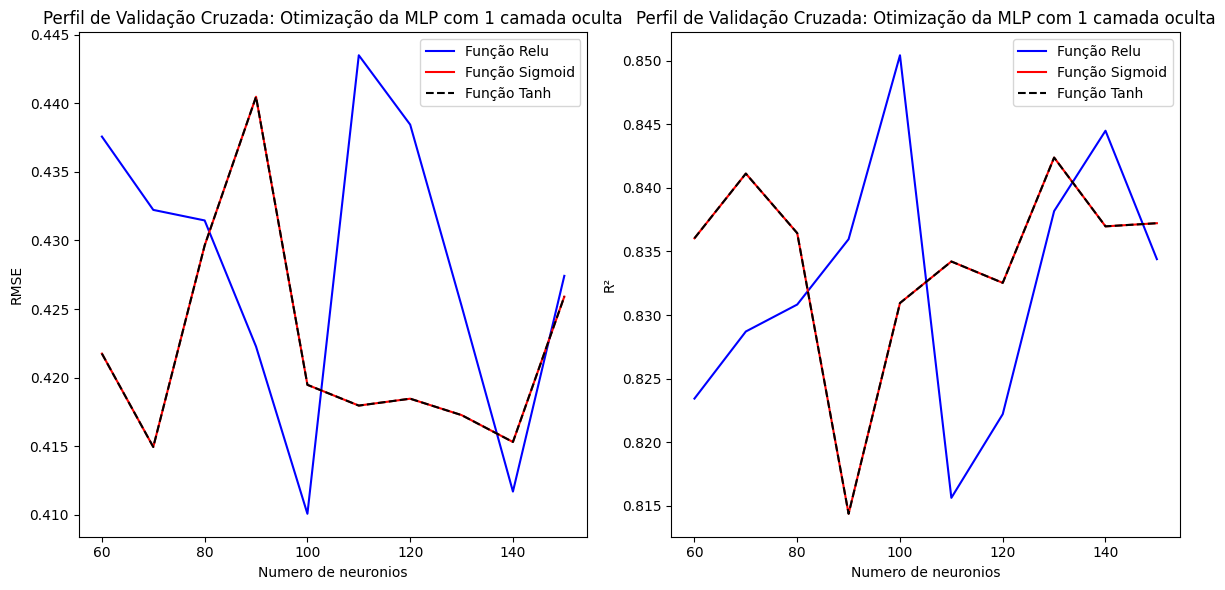

In [29]:
rmseRelu = rmse_funcs[0]
r2Relu = r2_funcs[0]
rmseSig = rmse_funcs[1]
r2Sig = r2_funcs[1]
rmseTanh = rmse_funcs[2]
r2Tanh= r2_funcs[2]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_neuronios, rmseRelu, color = 'blue', label = 'Função Relu')
plt.plot(num_neuronios, rmseTanh, color = 'red',linestyle='-', label ='Função Sigmoid')
plt.plot(num_neuronios, rmseTanh, color = 'black', linestyle='--', label = 'Função Tanh')
plt.xlabel('Numero de neuronios')
plt.ylabel('RMSE')
plt.title('Perfil de Validação Cruzada: Otimização da MLP com 1 camada oculta' )
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_neuronios, r2Relu, color = 'blue', label = 'Função Relu')
plt.plot(num_neuronios, r2Tanh, color = 'red', label ='Função Sigmoid')
plt.plot(num_neuronios, r2Tanh, color = 'black', linestyle='--', label = 'Função Tanh')
plt.xlabel('Numero de neuronios')
plt.ylabel('R²')
plt.title('Perfil de Validação Cruzada: Otimização da MLP com 1 camada oculta' )
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
mpldf = pd.DataFrame(df)

In [31]:
modelo_otimo = Sequential([
            Input(shape=(x.shape[1],)),  # Dimensão de entrada
            Dense(90, activation = 'sigmoid'),
            Dense(1)  # Saída única para regressão
        ])
modelo_otimo.summary()
modelo_otimo.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
rmse,r2 = cross_validation_scratch(modelo_otimo, x, y, k, network = True)
print(rmse)

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 90)             │        20,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,701 (80.86 KB)

 Trainable params: 20,701 (80.86 KB)

 Non-trainable params: 0 (0.00 B)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.5066320257825316


In [32]:
k = 5
x = XT
y = Y
xt = XTtest
yt = Ytest
num_neuronios = [60,70,80,90,100,110,120,130,140,150]

rmse_sem_ocultas = []
r2_sem_ocultas = []
modelo0 = Sequential([
            Input(shape=(x.shape[1],)),  # Dimensão de entrada,
            Dense(1)  # Saída única para regressão
        ])
modelo0.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
rmse,r2 = cross_validation_scratch(modelo0, x, y, k, network = True)
for i in num_neuronios:
    rmse_sem_ocultas.append(rmse)
    r2_sem_ocultas.append(r2)

rmse_1_ocultas = []
r2_1_ocultas = []
resultado = []
for n in num_neuronios:
    modelo1 = Sequential([
                Input(shape=(x.shape[1],)),  # Dimensão de entrada
                Dense(n, activation = 'sigmoid'),
                Dense(1)  # Saída única para regressão
            ])
    modelo1.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
    rmse,r2 = cross_validation_scratch(modelo1, x, y, k, network = True)
    rmse_1_ocultas.append(rmse)
    r2_1_ocultas.append(r2)
    resultado.append({'Num': n, 'R2': r2, 'RMSE': rmse})
    
    # Converter os resultados para DataFrame
df = pd.DataFrame(resultado)
num_otimo = df.loc[df['RMSE'].idxmin(), 'Num']
    
    
rmse_2_ocultas = []
r2_2_ocultas = []
for n in num_neuronios:
    modelo2 = Sequential([
        Input(shape=(x.shape[1],)),  # Dimensão de entrada
        Dense(num_otimo, activation = 'sigmoid'),
        Dense(n, activation = 'sigmoid'),
        Dense(1)  # Saída única para regressão
    ])
    modelo2.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
    rmse,r2 = cross_validation_scratch(modelo2, x, y, k, network = True)
    rmse_2_ocultas.append(rmse)
    r2_2_ocultas.append(r2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━

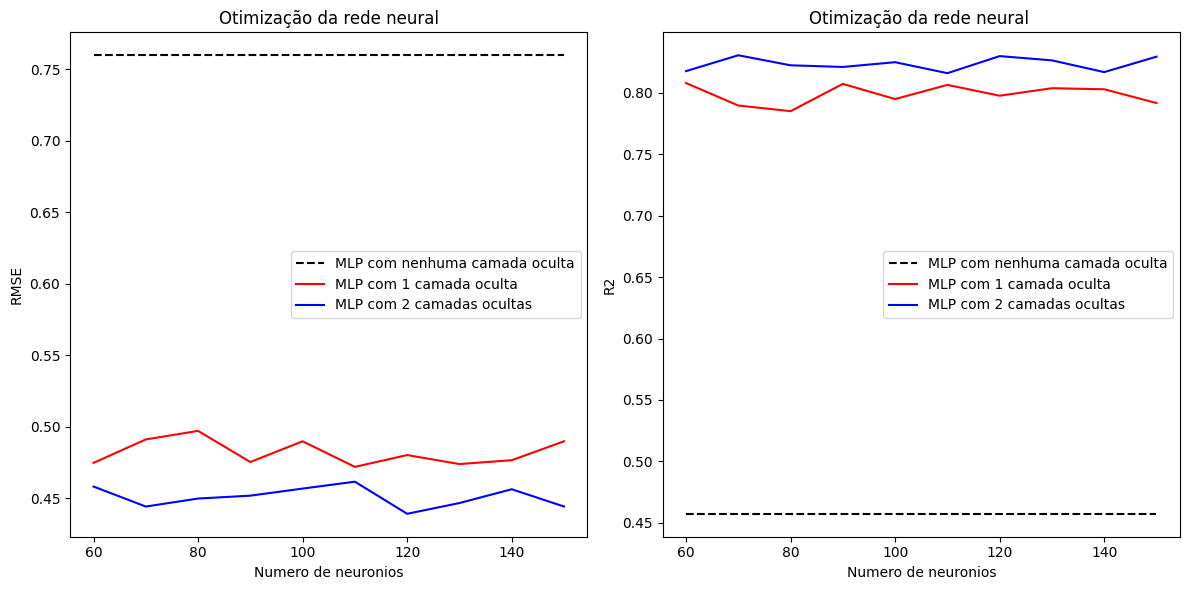

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_neuronios, rmse_sem_ocultas, color = 'black', linestyle='--', label = 'MLP com nenhuma camada oculta')
plt.plot(num_neuronios, rmse_1_ocultas, color = 'red', label = 'MLP com 1 camada oculta')
plt.plot(num_neuronios, rmse_2_ocultas, color = 'blue', label = 'MLP com 2 camadas ocultas')
plt.xlabel('Numero de neuronios')
plt.ylabel('RMSE')
plt.title('Otimização da rede neural' )
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_neuronios, r2_sem_ocultas, color = 'black', linestyle='--', label = 'MLP com nenhuma camada oculta')
plt.plot(num_neuronios, r2_1_ocultas, color = 'red', label = 'MLP com 1 camada oculta')
plt.plot(num_neuronios, r2_2_ocultas, color = 'blue', label = 'MLP com 2 camadas ocultas')
plt.xlabel('Numero de neuronios')
plt.ylabel('R2')
plt.title('Otimização da rede neural ' )
plt.legend()

plt.tight_layout()
plt.show()

# Resumo Geral

In [34]:
x = XT
y = Y
xt = XTtest
yt = Ytest

#-----------------------------------------------------------------#
# OLS
# Fit e Predict
modelo = MyOLS()
modelo.fit(x,y)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('OLS padrão')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
# Ridge
modelo = MyRidge(penal = 4.243212121212121 )
modelo.fit(x,y)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('Ridge')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
# PCA
# Fit e Predict
pca = PCA(n_components = 61)
modelo = MyOLS()
# Criando os componentes principais
x_train_pca = pd.DataFrame(pca.fit_transform(x))
x_test_pca = pd.DataFrame(pca.transform(xt))
# Fit e Predict
modelo.fit(x_train_pca, y)
y_pred = modelo.predict(x_test_pca)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('PCA')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
# PLS
# Fit e Predict
modelo = PLSRegression(n_components = 18)
modelo.fit(x, y)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('PLS')
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
#-----------------------------------------------------------------#
#Rede Neural
modelo = Sequential([
  Input(shape=(x.shape[1],)),  # Dimensão de entrada
  Dense(90, activation ='sigmoid'),
  Dense(1)  # Saída única para regressão
])
modelo.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
modelo.fit(x, y, epochs=100, batch_size=32, verbose=0)
y_pred = modelo.predict(xt)
rmse = calcular_rmse(yt, y_pred)
r2 = calcular_r2(yt, y_pred)
print('------------------------------')
print('Rede Neural')
print(f"RMSE: {np.mean(rmse_list):.4f}, R²: {np.mean(r2_list):.4f}")
#-----------------------------------------------------------------#


------------------------------
OLS padrão
RMSE: 0.7456, R²: 0.8709
------------------------------
Ridge
RMSE: 0.7305, R²: 0.8761
------------------------------
PCA
RMSE: 0.7858, R²: 0.8566
------------------------------
PLS
RMSE: 0.7296, R²: 0.8764
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
------------------------------
Rede Neural
RMSE: 0.4221, R²: 0.8342
